In [4]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
#!pip install missingno
#visualize and analyze missing data in a dataset
import missingno as msno
import wordcloud

plt.rcParams['figure.figsize'] = [12, 8]


In [5]:
!unzip pupg.zip

Archive:  pupg.zip
  inflating: pubg-weapon-stats.csv   


In [19]:
df = pd.read_csv('pubg-weapon-stats.csv')
df.head()

,Weapon Name,Weapon Type,Bullet Type,Damage,Magazine Capacity,Range,Bullet Speed,Rate of Fire,Shots to Kill (Chest),Shots to Kill (Head),Damage Per Second,Fire Mode,BDMG_0,BDMG_1,BDMG_2,BDMG_3,HDMG_0,HDMG_1,HDMG_2,HDMG_3
0,Groza,Assault Rifle,7.62,49,30,400.0,715.0,0.080,4,2,612.0,"Single, Automatic, Burst",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
1,AKM,Assault Rifle,7.62,49,30,400.0,710.0,0.010,4,2,490.0,"Single, Automatic",47.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
2,M762,Assault Rifle,7.62,47,30,400.0,715.0,0.086,4,2,547.0,"Single, Automatic, Burst",46.0,32.9,28.2,21.1,110.4,77.3,66.2,49.7
3,MK47 Mutant,Assault Rifle,7.62,49,30,500.0,715.0,0.010,4,2,490.0,"Single, Burst",49.0,34.3,29.4,22.0,115.1,80.6,69.0,51.8
4,AUG A3,Assault Rifle,5.56,43,30,600.0,880.0,0.086,4,2,502.0,"Single, Automatic",41.0,30.1,25.8,19.3,101.0,70.7,60.6,45.4


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            38 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  38 non-null     float64
 6   Bullet Speed           36 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 37 non-null     float64
 13  BDMG_1                 37 non-null     float64
 14  BDMG_2                 37 non-null     float64
 15  BDMG_3  

In [7]:
df.duplicated().sum()

0

In [21]:
df.isna().sum()

,0
Weapon Name,0
Weapon Type,0
Bullet Type,6
Damage,0
Magazine Capacity,0
Range,6
Bullet Speed,8
Rate of Fire,0
Shots to Kill (Chest),0
Shots to Kill (Head),0


In [22]:
print(df['Weapon Name'].nunique())
print(df['Weapon Type'].nunique())
print(df['Fire Mode'].nunique())
print(df['Bullet Type'].nunique())

44
9
5
6


In [23]:
DF = df.copy()
DF.dropna(inplace=True)
DF.info()

<class 'pandas.core.frame.DataFrame'>
Index: 35 entries, 0 to 36
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            35 non-null     object 
 1   Weapon Type            35 non-null     object 
 2   Bullet Type            35 non-null     float64
 3   Damage                 35 non-null     int64  
 4   Magazine Capacity      35 non-null     int64  
 5   Range                  35 non-null     float64
 6   Bullet Speed           35 non-null     float64
 7   Rate of Fire           35 non-null     float64
 8   Shots to Kill (Chest)  35 non-null     int64  
 9   Shots to Kill (Head)   35 non-null     int64  
 10  Damage Per Second      35 non-null     float64
 11  Fire Mode              35 non-null     object 
 12  BDMG_0                 35 non-null     float64
 13  BDMG_1                 35 non-null     float64
 14  BDMG_2                 35 non-null     float64
 15  BDMG_3       

In [24]:
print(DF['Weapon Name'].nunique())
print(DF['Weapon Type'].nunique())
print(DF['Fire Mode'].nunique())
print(DF['Bullet Type'].nunique())

35
7
5
6


# ***Handle Missing Values***

In [26]:
df.isna().sum()

,0
Weapon Name,0
Weapon Type,0
Bullet Type,6
Damage,0
Magazine Capacity,0
Range,6
Bullet Speed,8
Rate of Fire,0
Shots to Kill (Chest),0
Shots to Kill (Head),0


In [25]:

# Numerical columns with NaN values
numerical_cols_with_nan = df.select_dtypes(include=np.number).columns[df.select_dtypes(include=np.number).isna().any()].tolist()
numerical_cols_with_nan

['Bullet Type',
 'Range',
 'Bullet Speed',
 'BDMG_0',
 'BDMG_1',
 'BDMG_2',
 'BDMG_3',
 'HDMG_0',
 'HDMG_1',
 'HDMG_2',
 'HDMG_3']

Distribution of Bullet Type:
count    38.000000
mean      6.747632
std       3.336421
min       0.300000
25%       5.560000
50%       7.620000
75%       9.000000
max      12.000000
Name: Bullet Type, dtype: float64


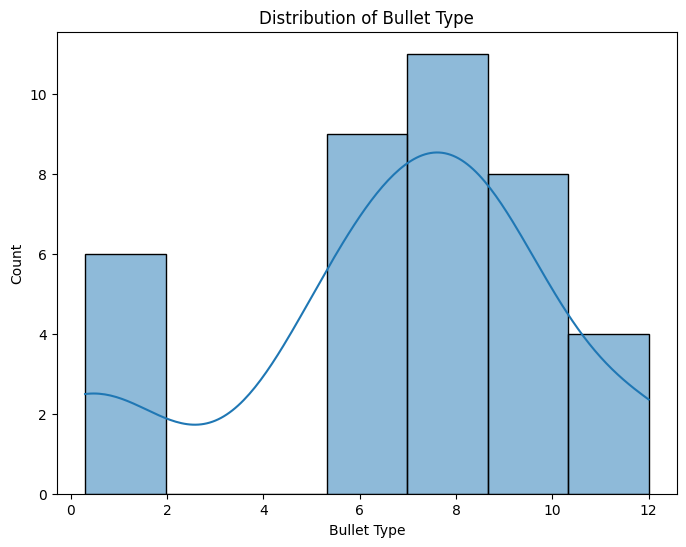

Distribution of Range:
count     38.000000
mean     403.552632
std      297.886492
min       25.000000
25%       52.500000
50%      400.000000
75%      600.000000
max      900.000000
Name: Range, dtype: float64


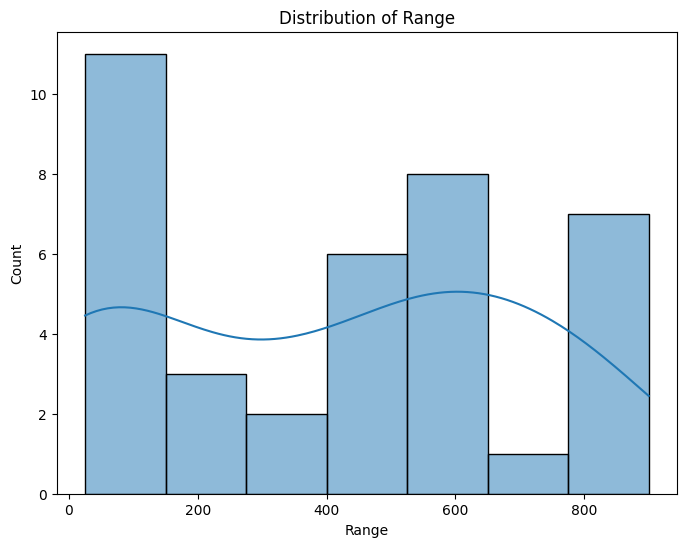

Distribution of Bullet Speed:
count     36.000000
mean     615.777778
std      256.455077
min      250.000000
25%      350.000000
50%      715.000000
75%      859.750000
max      990.000000
Name: Bullet Speed, dtype: float64


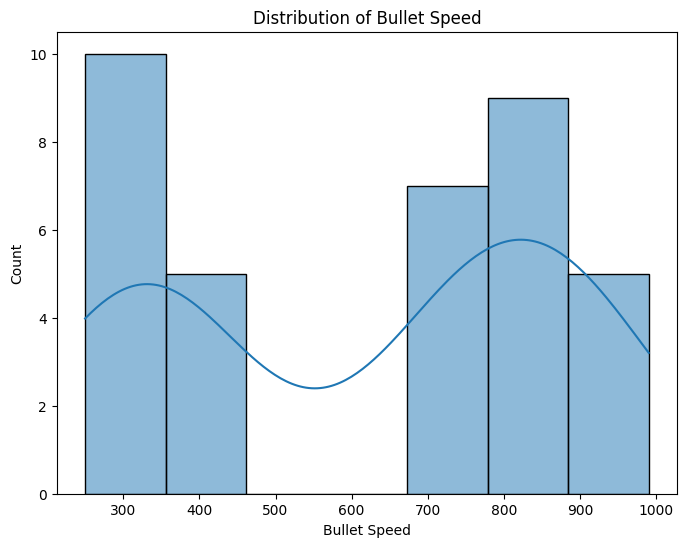

Distribution of BDMG_0:
count     37.000000
mean      68.081081
std       57.379254
min       22.400000
25%       41.000000
50%       47.000000
75%       60.900000
max      282.600000
Name: BDMG_0, dtype: float64


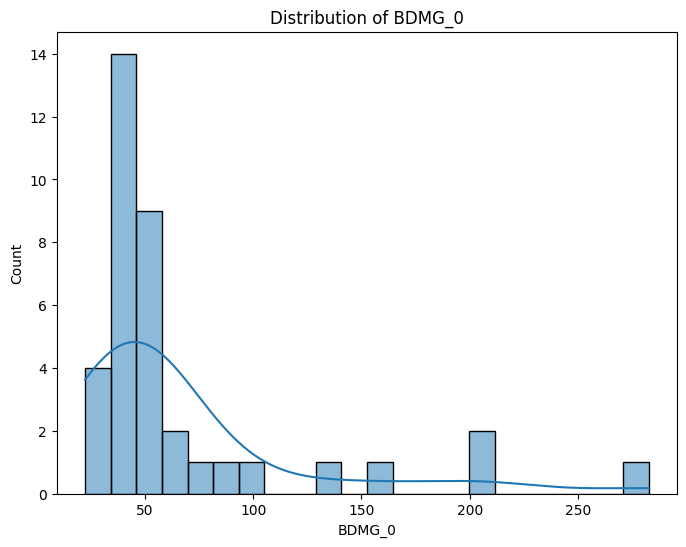

Distribution of BDMG_1:
count     37.000000
mean      47.929730
std       40.074853
min       15.700000
25%       30.100000
50%       33.800000
75%       42.600000
max      198.000000
Name: BDMG_1, dtype: float64


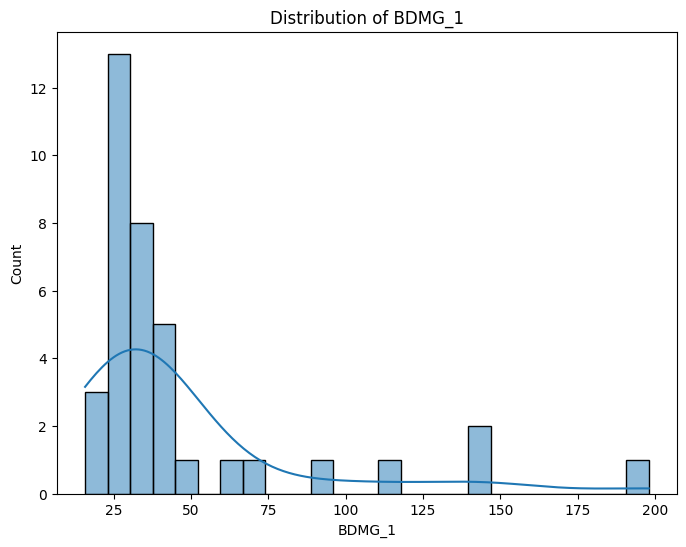

Distribution of BDMG_2:
count     37.00000
mean      41.02973
std       34.22249
min       13.40000
25%       25.80000
50%       28.90000
75%       36.50000
max      169.20000
Name: BDMG_2, dtype: float64


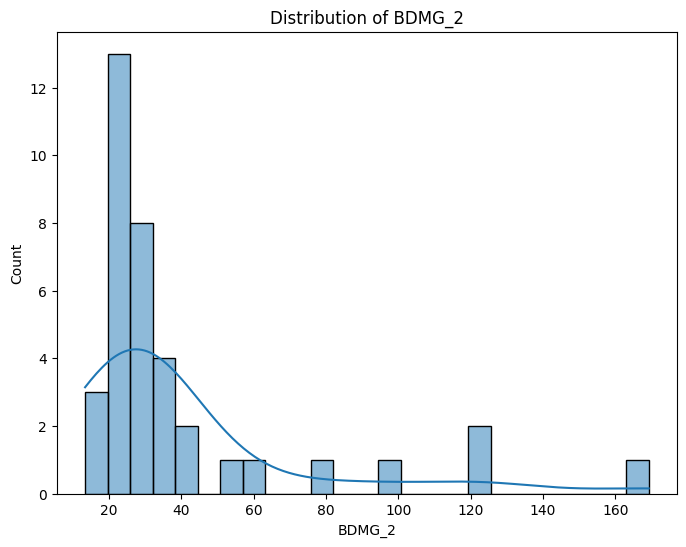

Distribution of BDMG_3:
count     37.000000
mean      30.762162
std       25.699852
min       10.100000
25%       19.300000
50%       21.700000
75%       27.400000
max      126.900000
Name: BDMG_3, dtype: float64


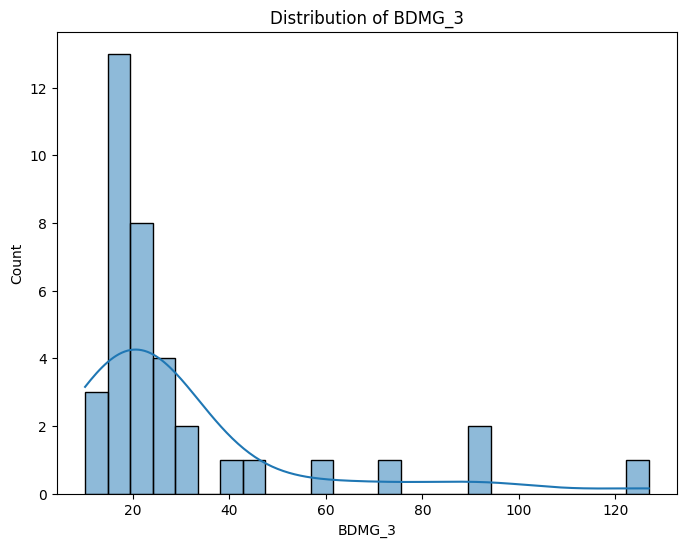

Distribution of HDMG_0:
count     37.000000
mean     125.756757
std       66.445937
min       44.900000
25%       96.300000
50%      109.600000
75%      136.300000
max      312.300000
Name: HDMG_0, dtype: float64


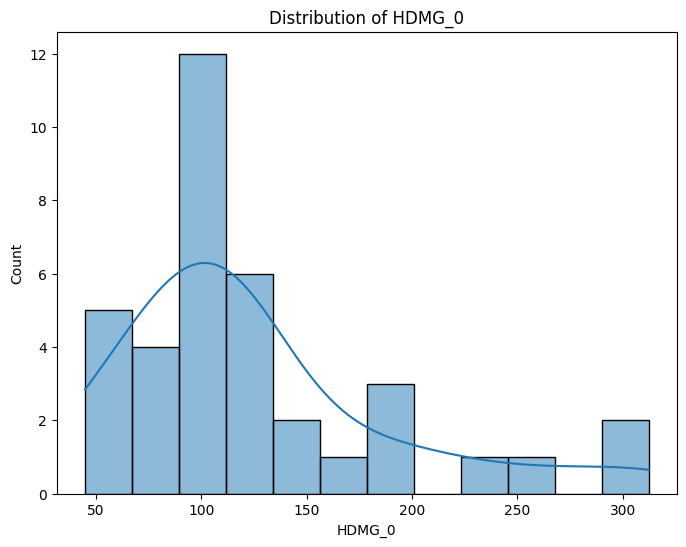

Distribution of HDMG_1:
count     37.000000
mean      88.024324
std       46.555728
min       31.400000
25%       67.400000
50%       76.700000
75%       95.400000
max      218.700000
Name: HDMG_1, dtype: float64


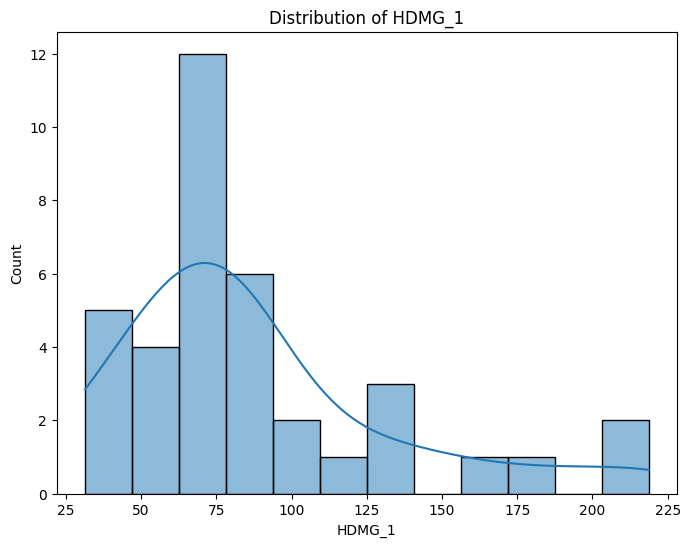

Distribution of HDMG_2:
count     37.000000
mean      75.418919
std       39.888009
min       26.900000
25%       57.800000
50%       65.700000
75%       81.700000
max      187.200000
Name: HDMG_2, dtype: float64


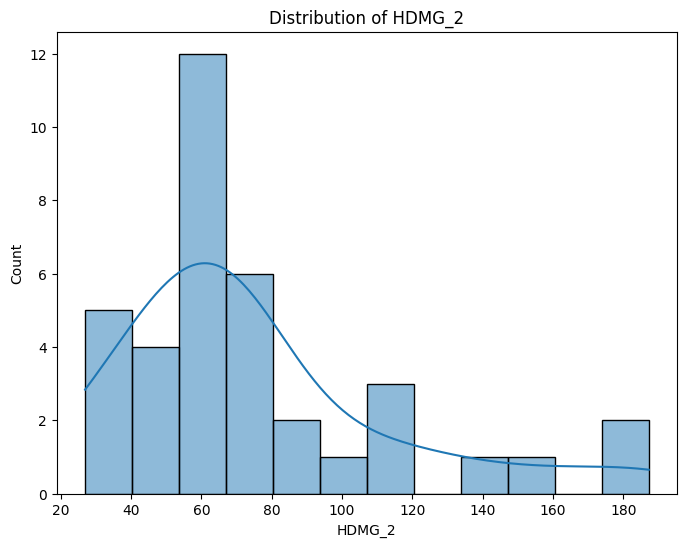

Distribution of HDMG_3:
count     37.000000
mean      56.554054
std       29.872717
min       20.200000
25%       43.300000
50%       49.300000
75%       61.300000
max      140.400000
Name: HDMG_3, dtype: float64


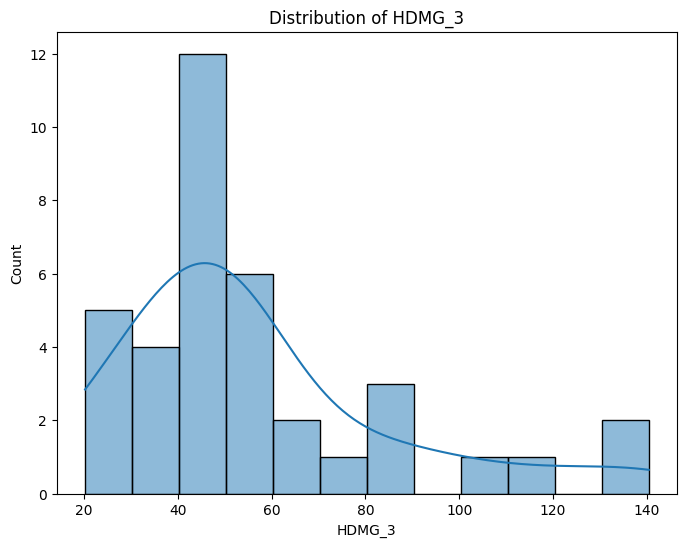

In [27]:
# get the distribution of numercal columns that have nan values and decide how to fill the nans in them

# Analyze the distribution of numerical columns with NaN values
for col in numerical_cols_with_nan:
    print(f"Distribution of {col}:")
    print(df[col].describe())
    plt.figure(figsize=(8, 6))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()



In [29]:
# Decide how to fill NaN values based on the distribution
# If the distribution is roughly normal, use the mean to fill NaN values
# If the distribution is skewed, use the median to fill NaN values

for col in numerical_cols_with_nan:
  if df[col].skew() > 0.5 or df[col].skew() < -0.5: #check for skewness
    df[col].fillna(df[col].median(), inplace = True)
    print(f"Filled NaN values in {col} with the median.")
  else:
    df[col].fillna(df[col].mean(), inplace=True)
    print(f"Filled NaN values in {col} with the mean.")

# Verify that there are no more NaN values in numerical columns
print(df.isna().sum())

Filled NaN values in Bullet Type with the median.
Filled NaN values in Range with the mean.
Filled NaN values in Bullet Speed with the mean.
Filled NaN values in BDMG_0 with the median.
Filled NaN values in BDMG_1 with the median.
Filled NaN values in BDMG_2 with the median.
Filled NaN values in BDMG_3 with the median.
Filled NaN values in HDMG_0 with the median.
Filled NaN values in HDMG_1 with the median.
Filled NaN values in HDMG_2 with the median.
Filled NaN values in HDMG_3 with the median.
Weapon Name              0
Weapon Type              0
Bullet Type              0
Damage                   0
Magazine Capacity        0
Range                    0
Bullet Speed             0
Rate of Fire             0
Shots to Kill (Chest)    0
Shots to Kill (Head)     0
Damage Per Second        0
Fire Mode                0
BDMG_0                   0
BDMG_1                   0
BDMG_2                   0
BDMG_3                   0
HDMG_0                   0
HDMG_1                   0
HDMG_2       

<ipython-input-29-59978900a695>:7: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df[col].fillna(df[col].median(), inplace = True)
<ipython-input-29-59978900a695>:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try usi

In [30]:
df.duplicated().sum()

0

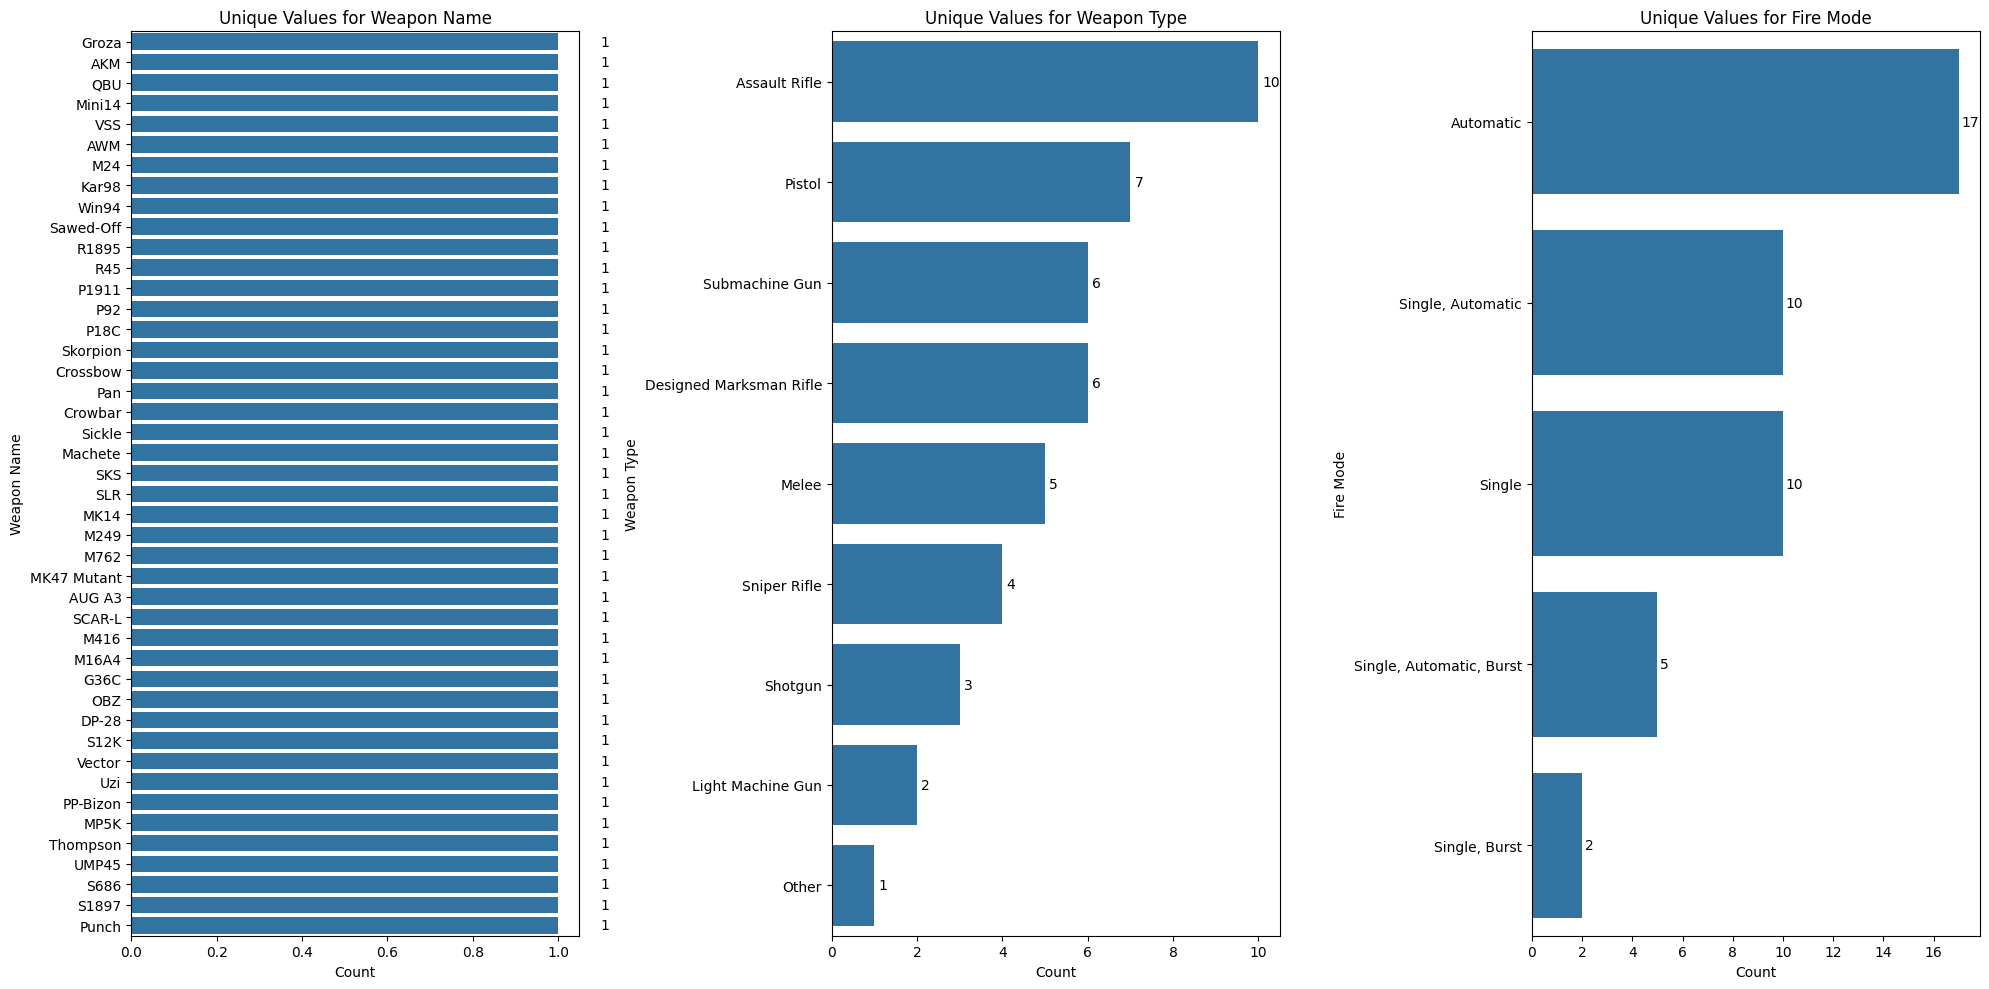

In [36]:
# display all unique values for each categorical column and visualiz it in subplots in horizontal bar

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame (from the previous code)
# If not, load your data here:
# df = pd.read_csv('your_file.csv')

categorical_cols = df.select_dtypes(include=['object']).columns

num_cols = len(categorical_cols)
num_rows = (num_cols + 2) // 3  # Calculate the number of rows for subplots

fig, axes = plt.subplots(num_rows, 3, figsize=(20, 10 * num_rows))
axes = axes.flatten() # flatten the array

for i, col in enumerate(categorical_cols):
    unique_vals = df[col].unique()
    value_counts = df[col].value_counts()

    sns.countplot(y=col, data=df, ax=axes[i], order=value_counts.index)
    axes[i].set_title(f'Unique Values for {col}')
    axes[i].set_xlabel('Count')

    # Optional: Add annotations for value counts
    for j, count in enumerate(value_counts):
          axes[i].text(count + 0.1, j, str(count), va='center')


# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.show()

In [41]:
# unique values of categorical data

# Check for unique values in categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"Unique values in {col}: {df[col].value_counts()}")

    print("----------------------------------------------------------------------------")

Unique values in Weapon Name: Weapon Name
Groza          1
AKM            1
QBU            1
Mini14         1
VSS            1
AWM            1
M24            1
Kar98          1
Win94          1
Sawed-Off      1
R1895          1
R45            1
P1911          1
P92            1
P18C           1
Skorpion       1
Crossbow       1
Pan            1
Crowbar        1
Sickle         1
Machete        1
SKS            1
SLR            1
MK14           1
M249           1
M762           1
MK47 Mutant    1
AUG A3         1
SCAR-L         1
M416           1
M16A4          1
G36C           1
OBZ            1
DP-28          1
S12K           1
Vector         1
Uzi            1
PP-Bizon       1
MP5K           1
Thompson       1
UMP45          1
S686           1
S1897          1
Punch          1
Name: count, dtype: int64
----------------------------------------------------------------------------
Unique values in Weapon Type: Weapon Type
Assault Rifle              10
Pistol                      7
Subma

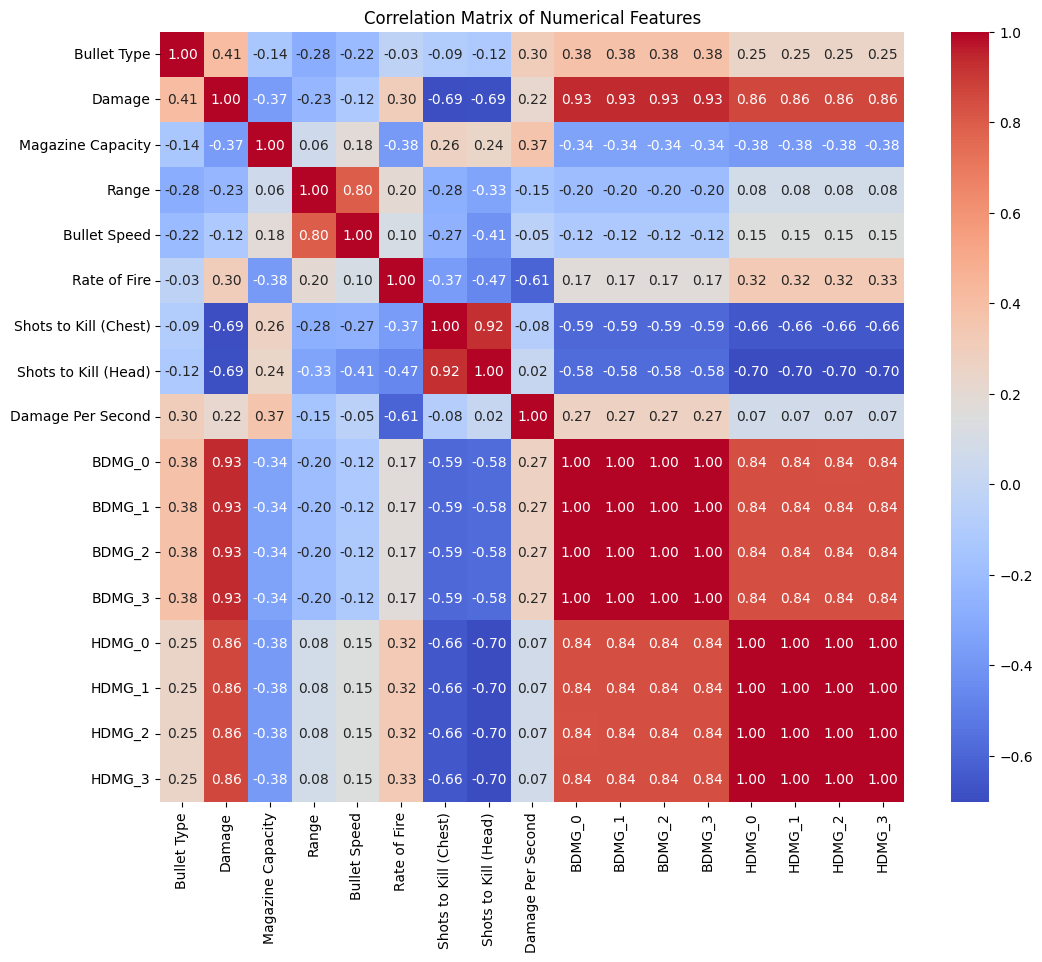

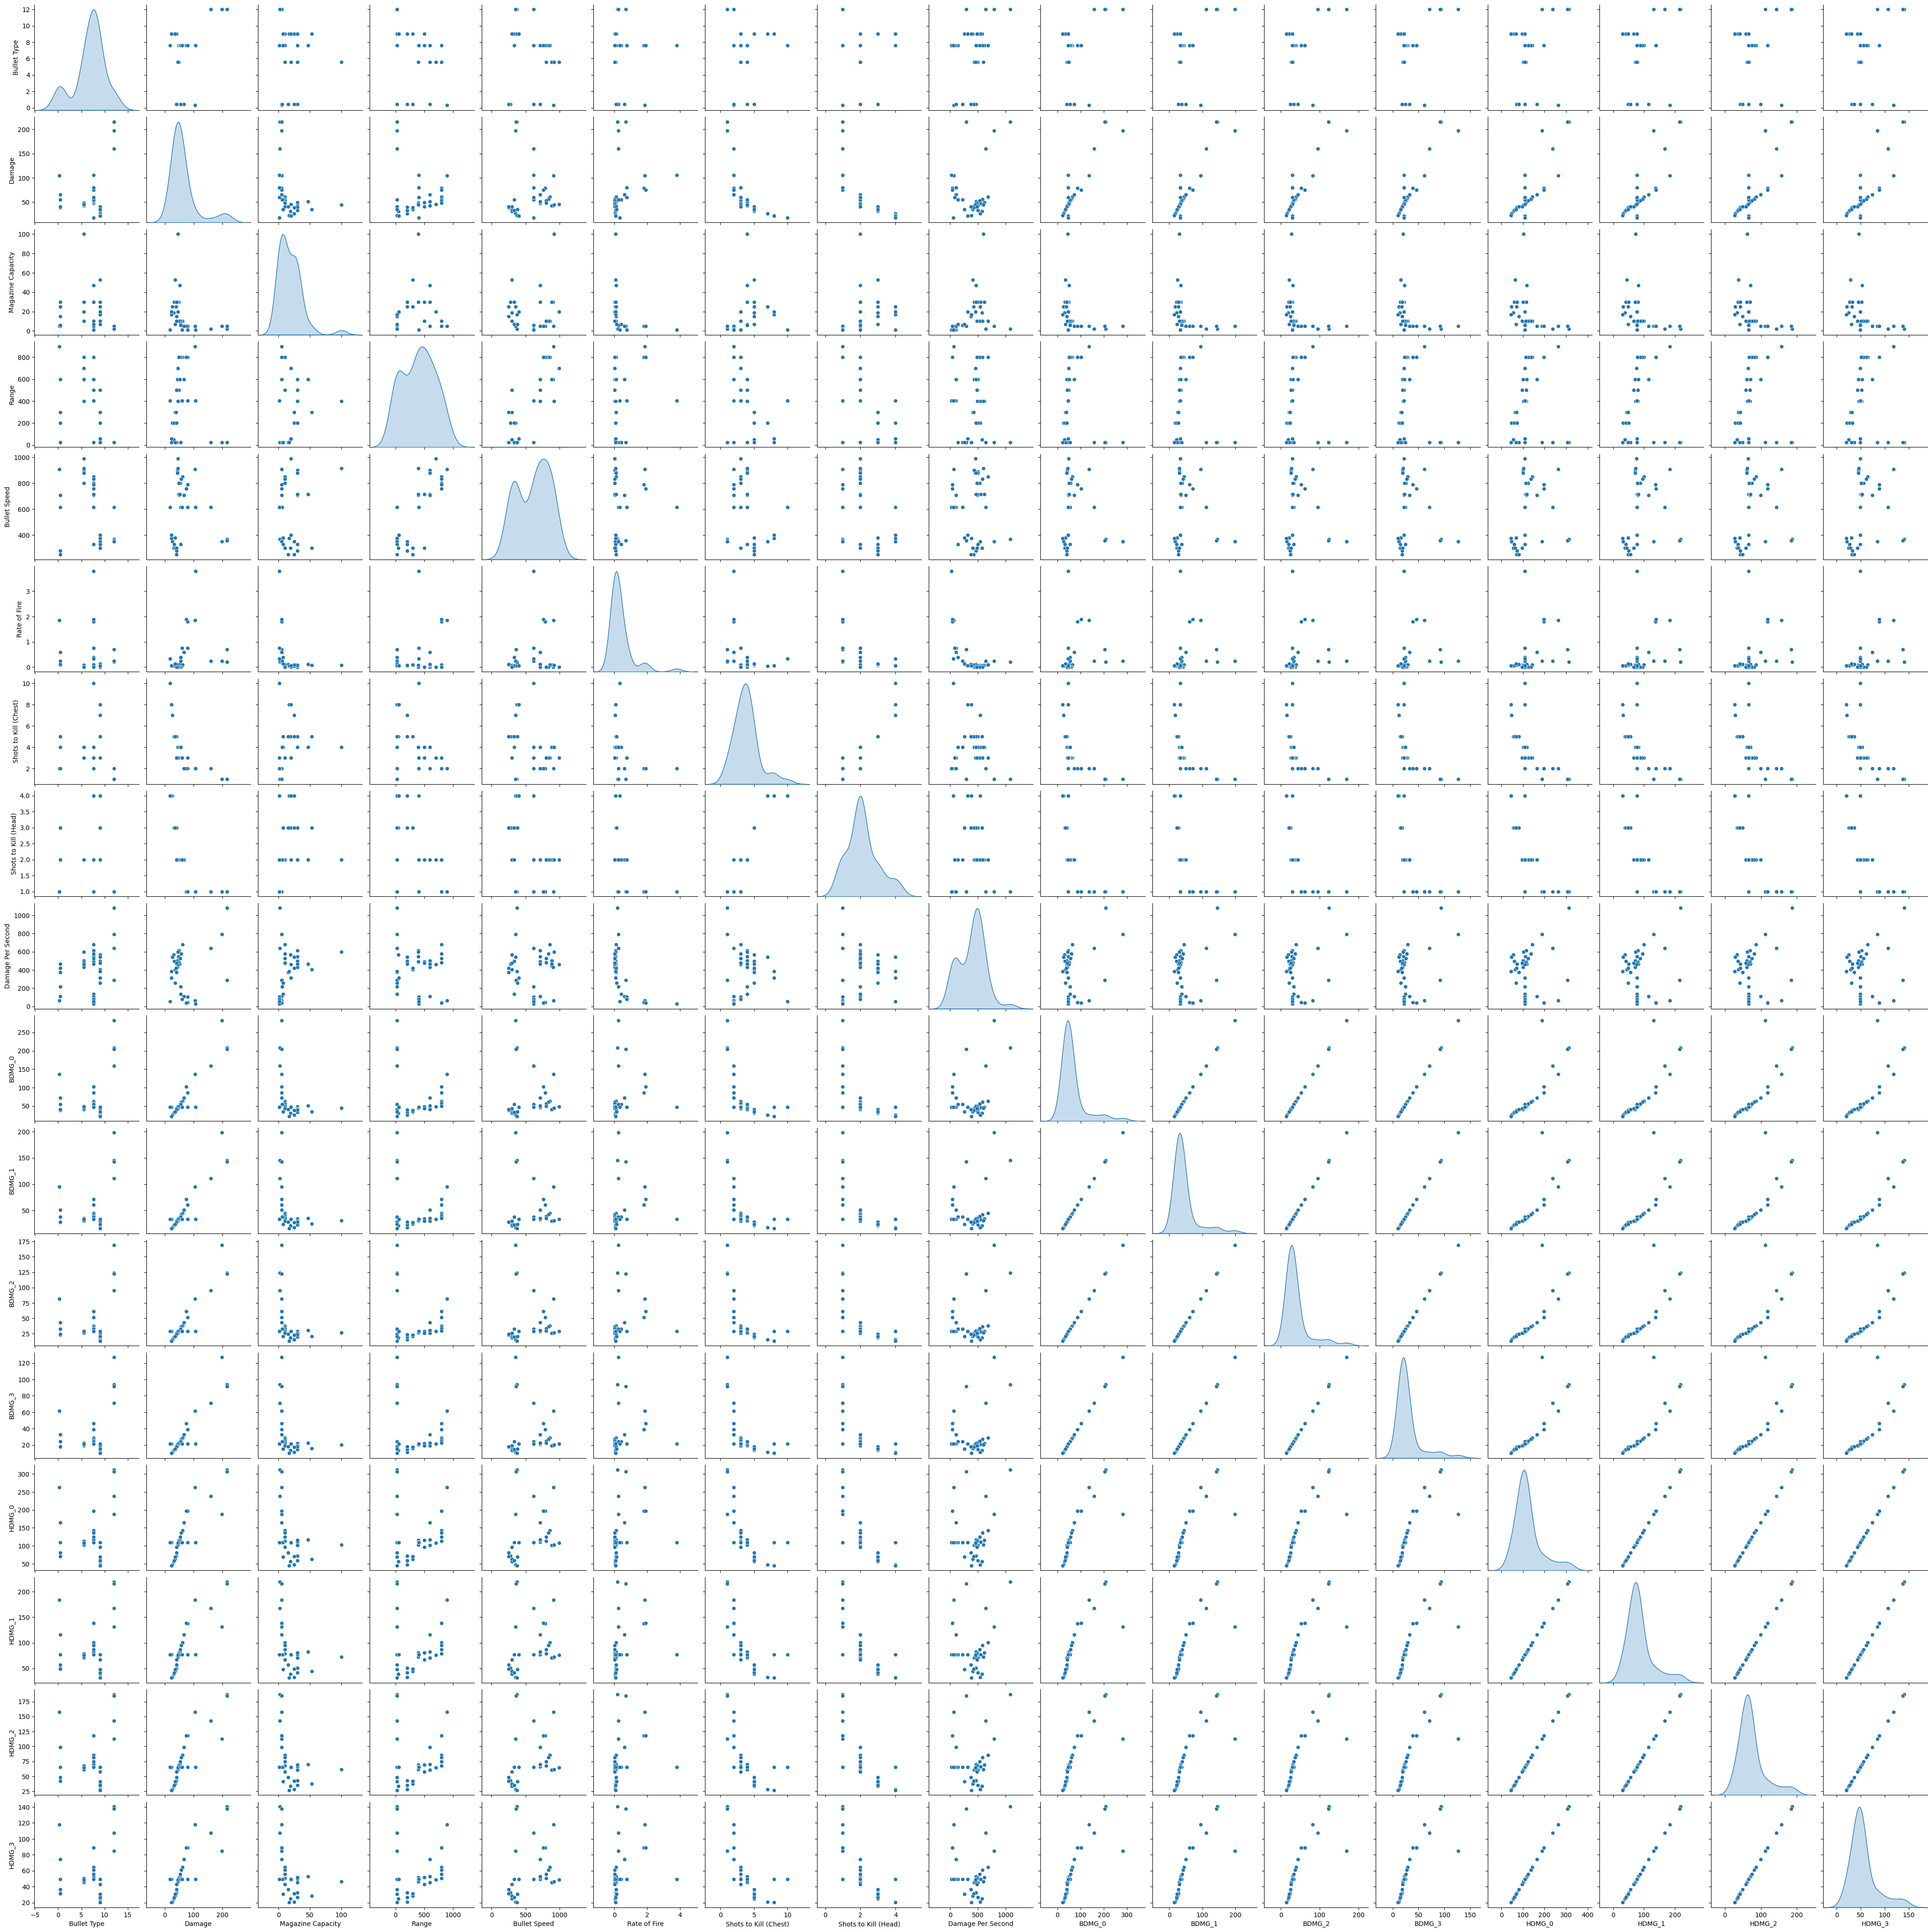

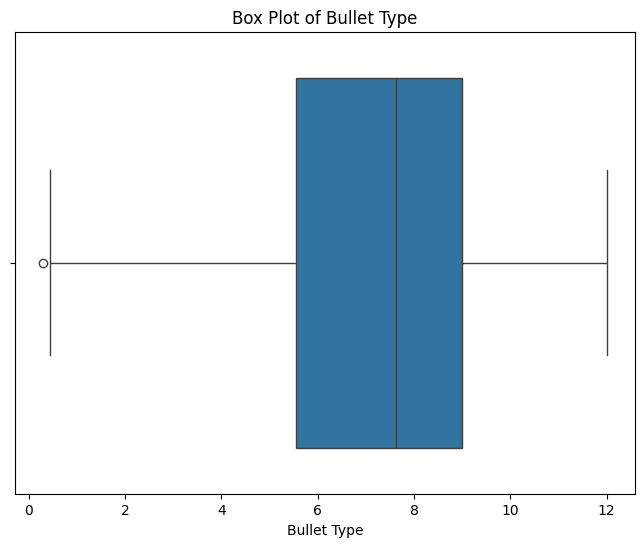

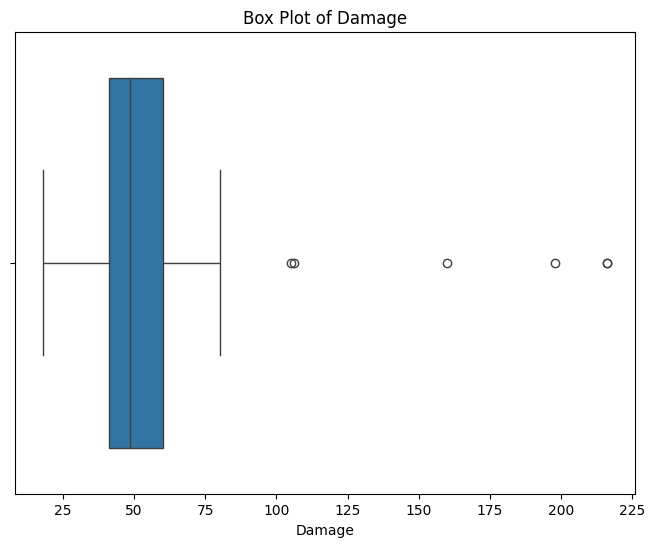

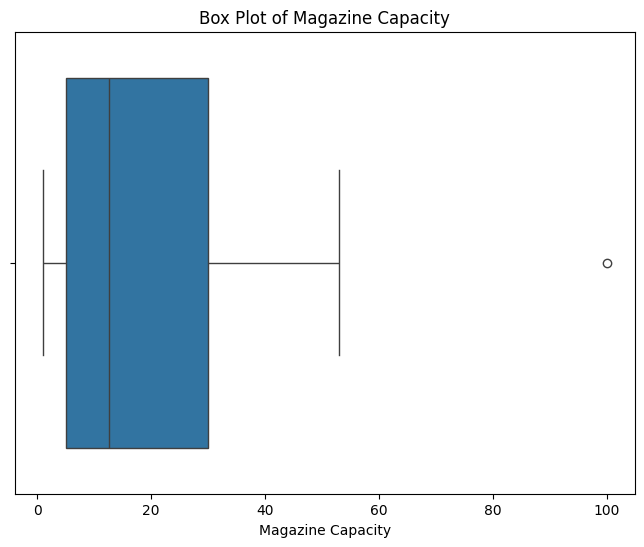

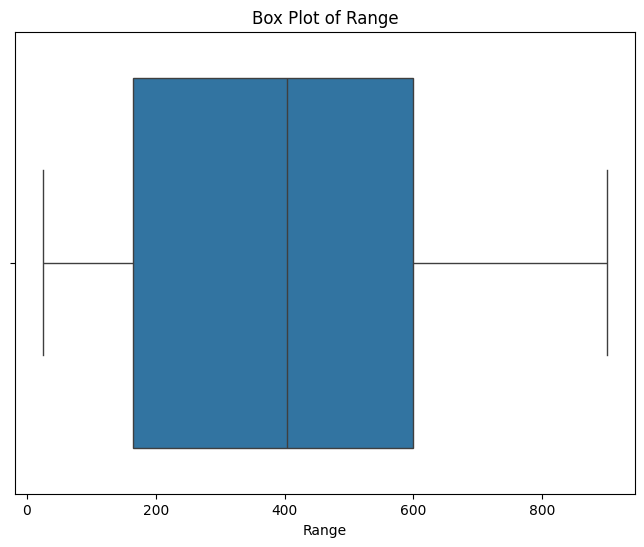

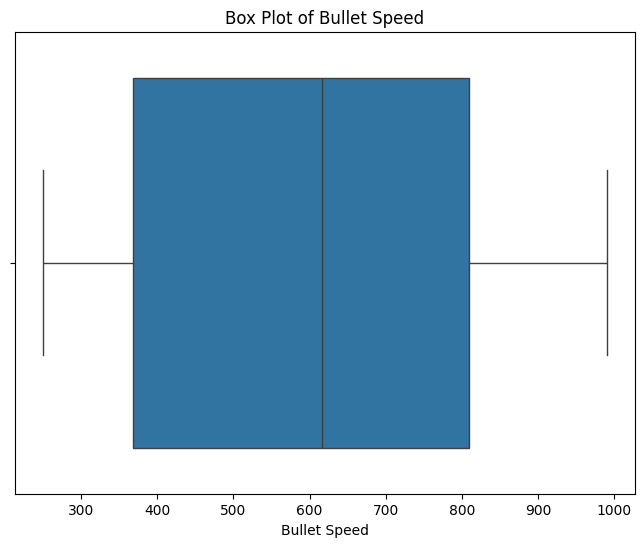

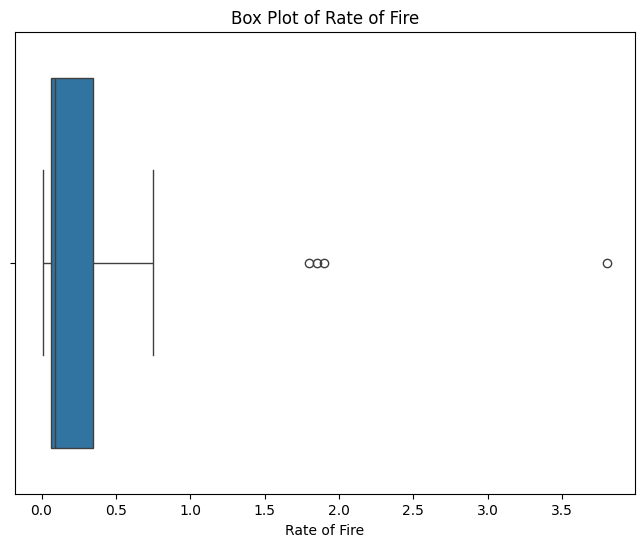

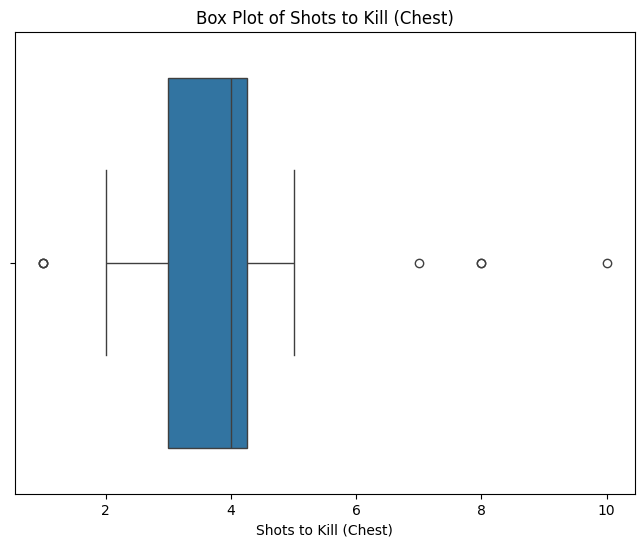

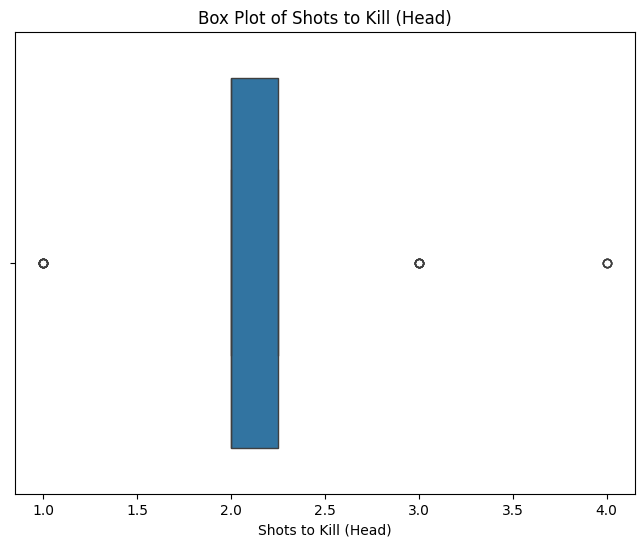

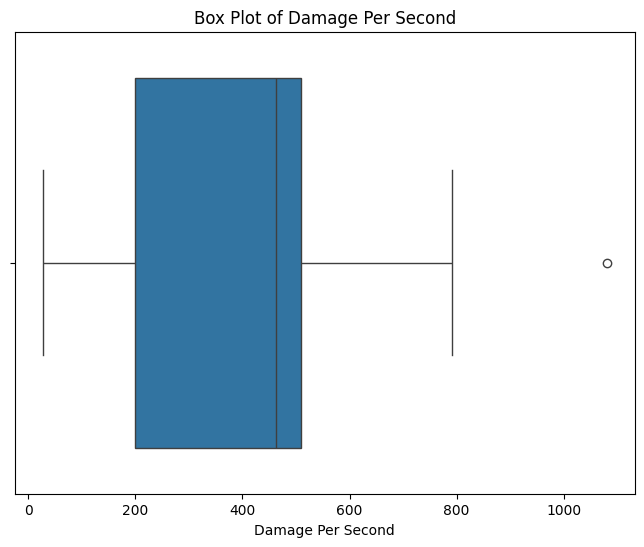

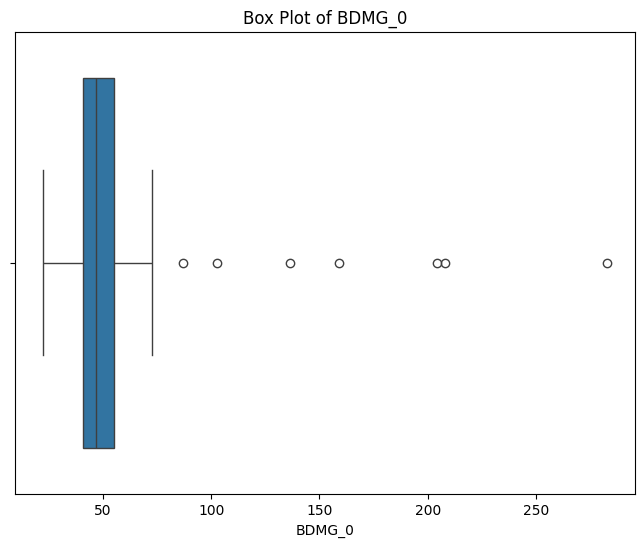

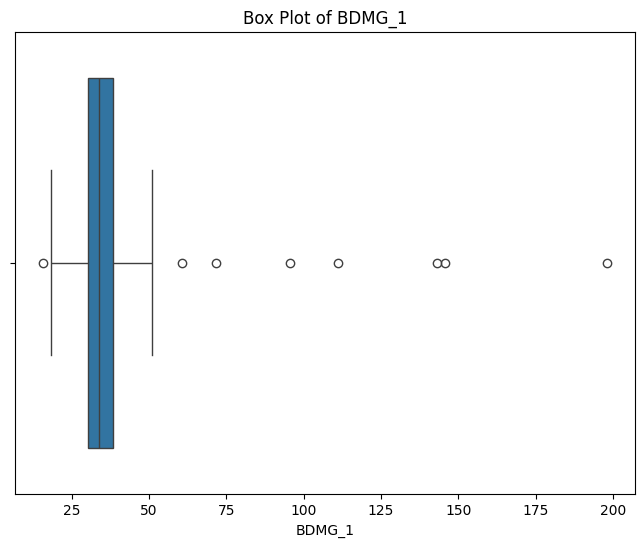

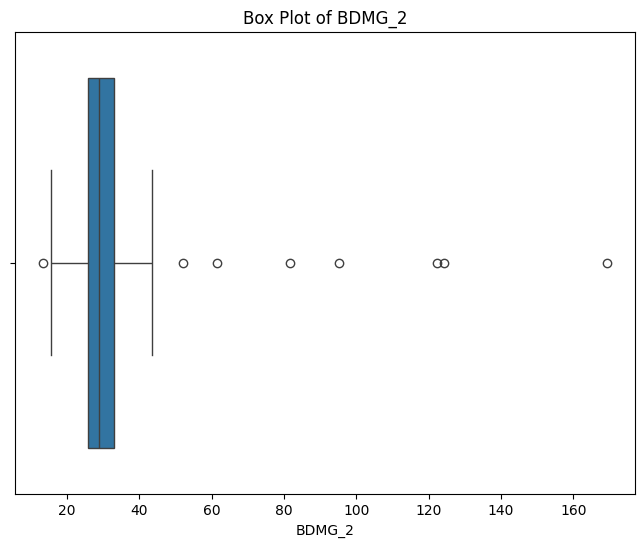

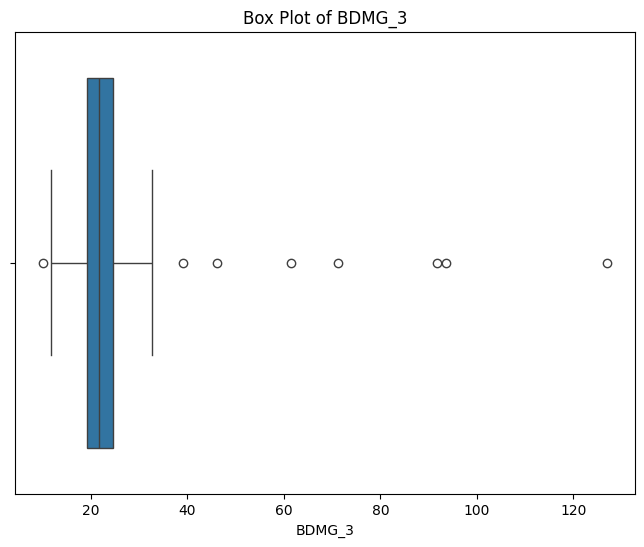

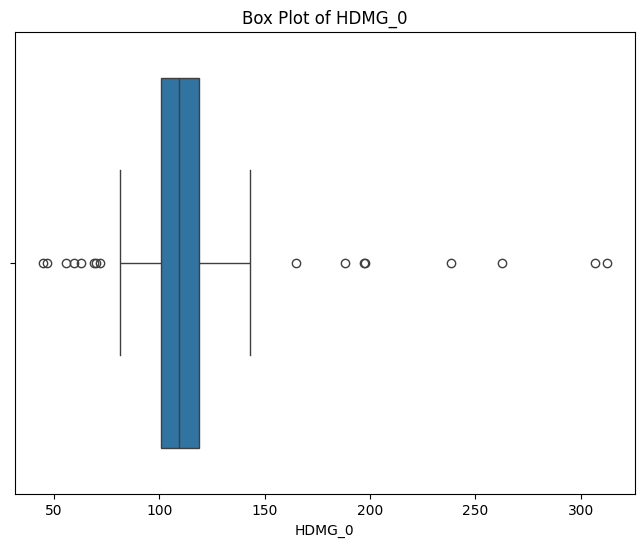

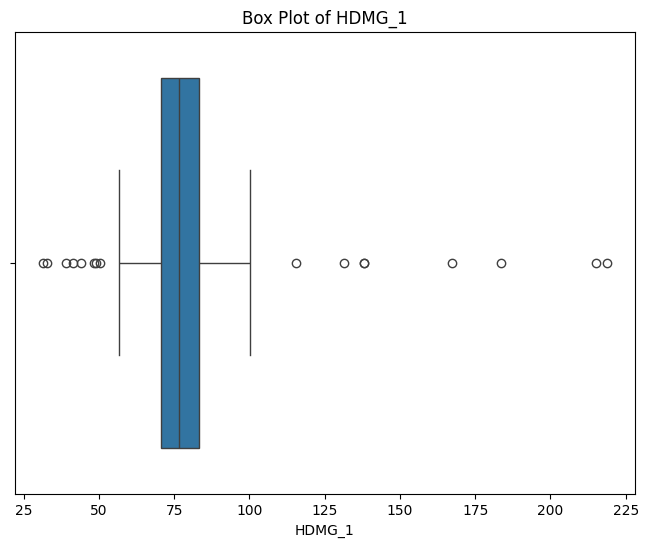

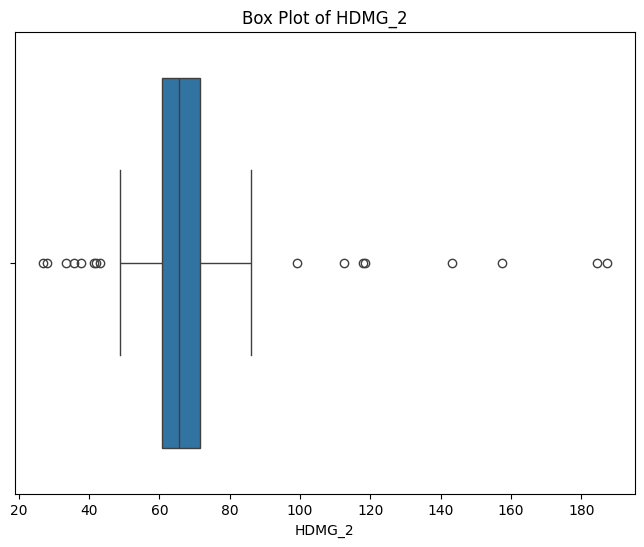

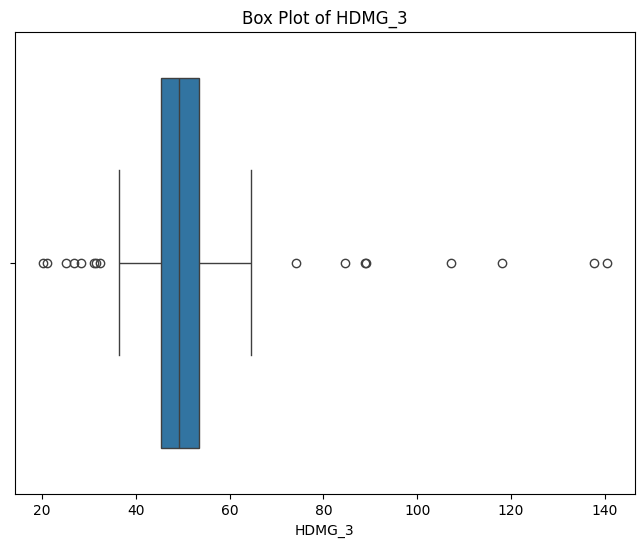

In [39]:

numerical_cols = df.select_dtypes(include=np.number).columns

# Correlation Matrix
plt.figure(figsize=(20, 15))
sns.heatmap(df[numerical_cols].corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Pairplot for numerical features
sns.pairplot(df[numerical_cols], diag_kind='kde')
plt.show()


# Box plots for numerical features
for col in numerical_cols:
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=col, data=df)
    plt.title(f'Box Plot of {col}')
    plt.show()

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 44 entries, 0 to 43
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   Weapon Name            44 non-null     object 
 1   Weapon Type            44 non-null     object 
 2   Bullet Type            44 non-null     float64
 3   Damage                 44 non-null     int64  
 4   Magazine Capacity      44 non-null     int64  
 5   Range                  44 non-null     float64
 6   Bullet Speed           44 non-null     float64
 7   Rate of Fire           44 non-null     float64
 8   Shots to Kill (Chest)  44 non-null     int64  
 9   Shots to Kill (Head)   44 non-null     int64  
 10  Damage Per Second      44 non-null     float64
 11  Fire Mode              44 non-null     object 
 12  BDMG_0                 44 non-null     float64
 13  BDMG_1                 44 non-null     float64
 14  BDMG_2                 44 non-null     float64
 15  BDMG_3  

In [ ]:
# prompt: save cleaned data

df.to_csv('cleaned_pubg_data.csv', index=False)

Weapon Type: Highlight which weapon types excel in Damage, Range, or Rate of Fire.

How do Damage, Range, and Bullet Speed vary across weapon types?

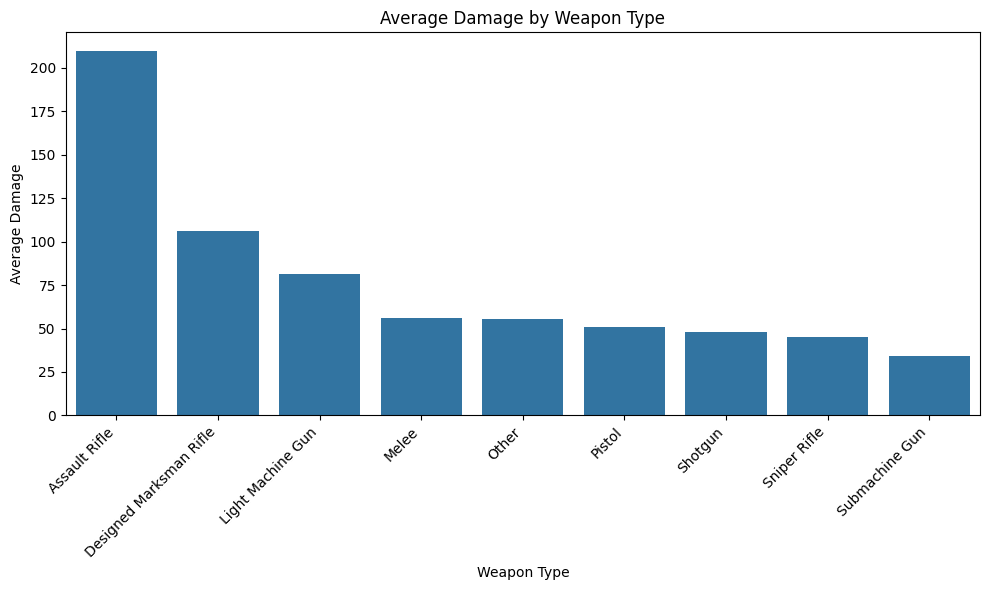

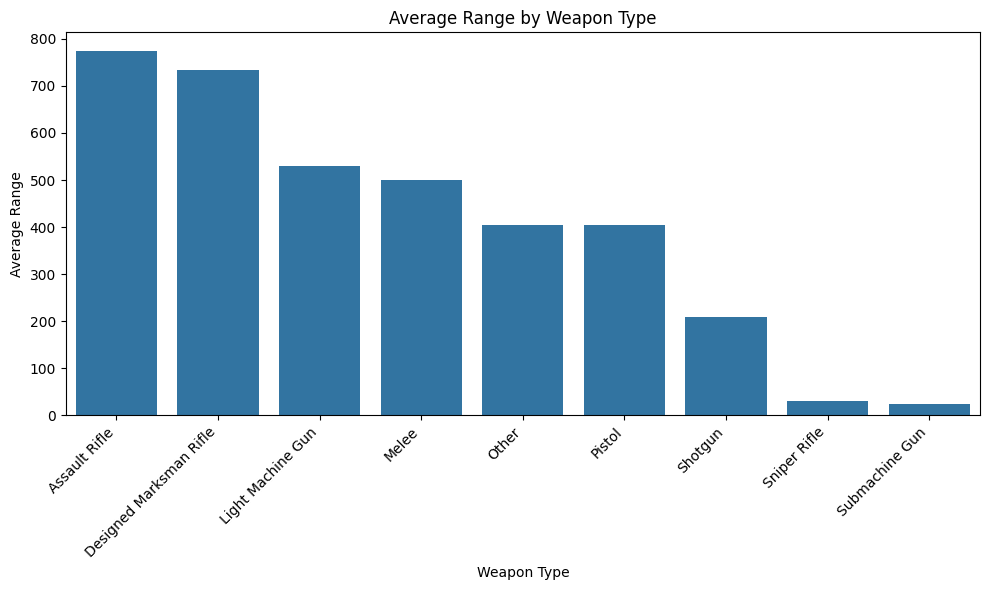

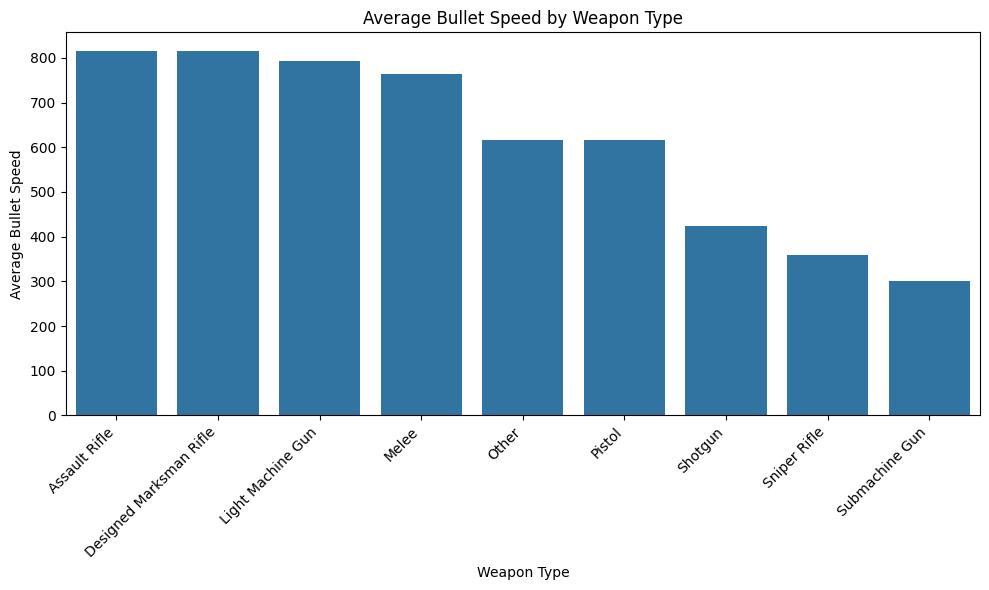

In [44]:


# Group data by weapon type and calculate the mean of Damage, Range, and Bullet Speed
weapon_stats = df.groupby('Weapon Type').agg({'Damage': 'mean', 'Range': 'mean', 'Bullet Speed': 'mean'})

# Plotting Damage vs. Weapon Type
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_stats.index, y='Damage', data=weapon_stats.sort_values(by=['Damage'], ascending=False))
plt.title('Average Damage by Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Average Damage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plotting Range vs. Weapon Type
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_stats.index, y='Range', data=weapon_stats.sort_values(by=['Range'], ascending=False))
plt.title('Average Range by Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Average Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()


# Plotting Bullet Speed vs. Weapon Type
plt.figure(figsize=(10, 6))
sns.barplot(x=weapon_stats.index, y='Bullet Speed', data=weapon_stats.sort_values(by=['Bullet Speed'], ascending=False))
plt.title('Average Bullet Speed by Weapon Type')
plt.xlabel('Weapon Type')
plt.ylabel('Average Bullet Speed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

How does bullet type affect performance?

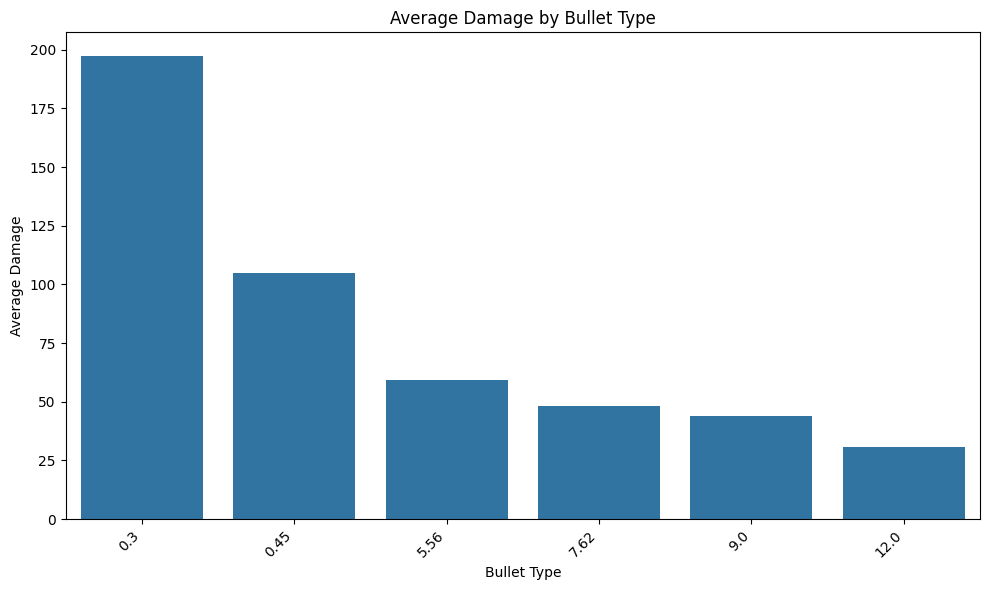

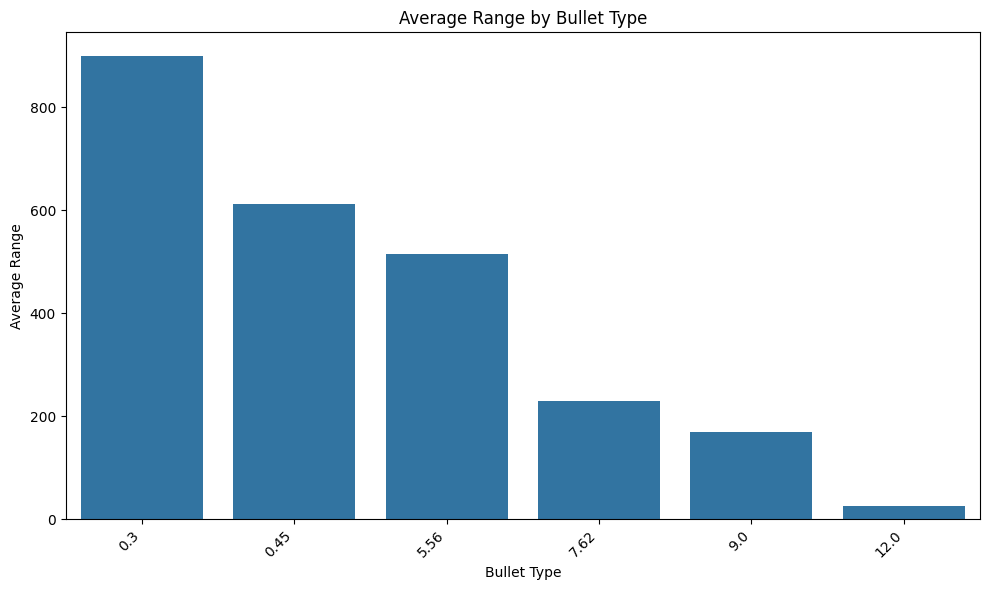

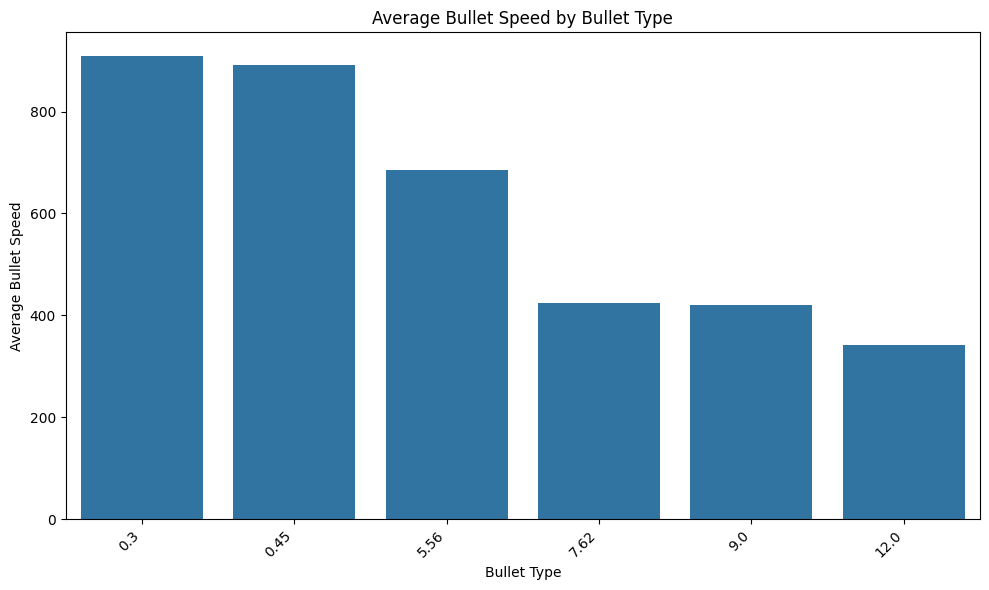

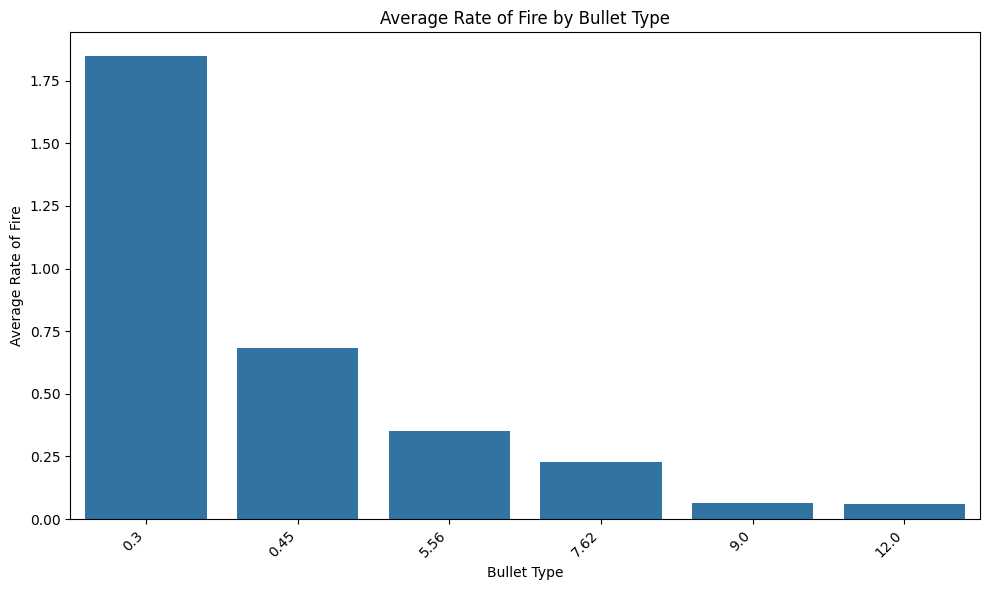

In [45]:

# Group data by bullet type and calculate the mean of relevant performance metrics
bullet_stats = df.groupby('Bullet Type').agg({'Damage': 'mean', 'Range': 'mean', 'Bullet Speed': 'mean', 'Rate of Fire': 'mean'})

# Plotting Damage vs. Bullet Type
plt.figure(figsize=(10, 6))
sns.barplot(x=bullet_stats.index, y='Damage', data=bullet_stats.sort_values(by=['Damage'], ascending=False))
plt.title('Average Damage by Bullet Type')
plt.xlabel('Bullet Type')
plt.ylabel('Average Damage')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Range vs. Bullet Type
plt.figure(figsize=(10, 6))
sns.barplot(x=bullet_stats.index, y='Range', data=bullet_stats.sort_values(by=['Range'], ascending=False))
plt.title('Average Range by Bullet Type')
plt.xlabel('Bullet Type')
plt.ylabel('Average Range')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Bullet Speed vs. Bullet Type
plt.figure(figsize=(10, 6))
sns.barplot(x=bullet_stats.index, y='Bullet Speed', data=bullet_stats.sort_values(by=['Bullet Speed'], ascending=False))
plt.title('Average Bullet Speed by Bullet Type')
plt.xlabel('Bullet Type')
plt.ylabel('Average Bullet Speed')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Rate of Fire vs. Bullet Type
plt.figure(figsize=(10, 6))
sns.barplot(x=bullet_stats.index, y='Rate of Fire', data=bullet_stats.sort_values(by=['Rate of Fire'], ascending=False))
plt.title('Average Rate of Fire by Bullet Type')
plt.xlabel('Bullet Type')
plt.ylabel('Average Rate of Fire')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [49]:
# what are used bullet types for each weapon type

# Group data by weapon type and get unique bullet types
weapon_bullet_types = df.groupby('Weapon Type')['Bullet Type'].unique()

# Print the results
for weapon_type, bullet_types in weapon_bullet_types.items():
    print(f"Weapon Type: {weapon_type}, Bullet Types: {bullet_types}")

Weapon Type: Assault Rifle, Bullet Types: [7.62 5.56]
Weapon Type: Designed Marksman Rifle, Bullet Types: [7.62 5.56 9.  ]
Weapon Type: Light Machine Gun, Bullet Types: [5.56 7.62]
Weapon Type: Melee, Bullet Types: [7.62]
Weapon Type: Other, Bullet Types: [7.62]
Weapon Type: Pistol, Bullet Types: [12.    7.62  0.45  9.  ]
Weapon Type: Shotgun, Bullet Types: [12.]
Weapon Type: Sniper Rifle, Bullet Types: [0.3  7.62 0.45]
Weapon Type: Submachine Gun, Bullet Types: [9.   0.45]


How do fire modes influence weapons?

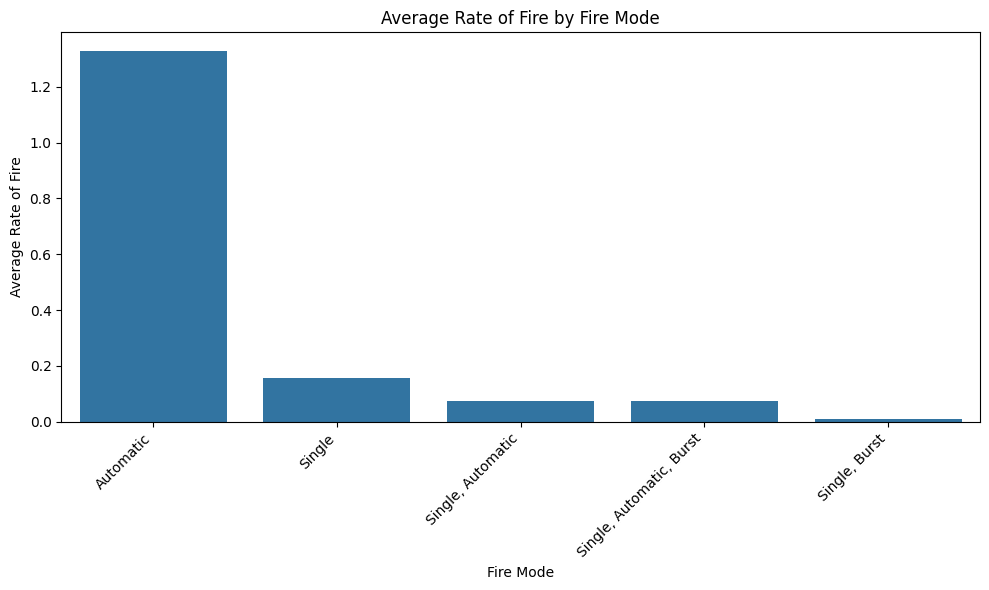

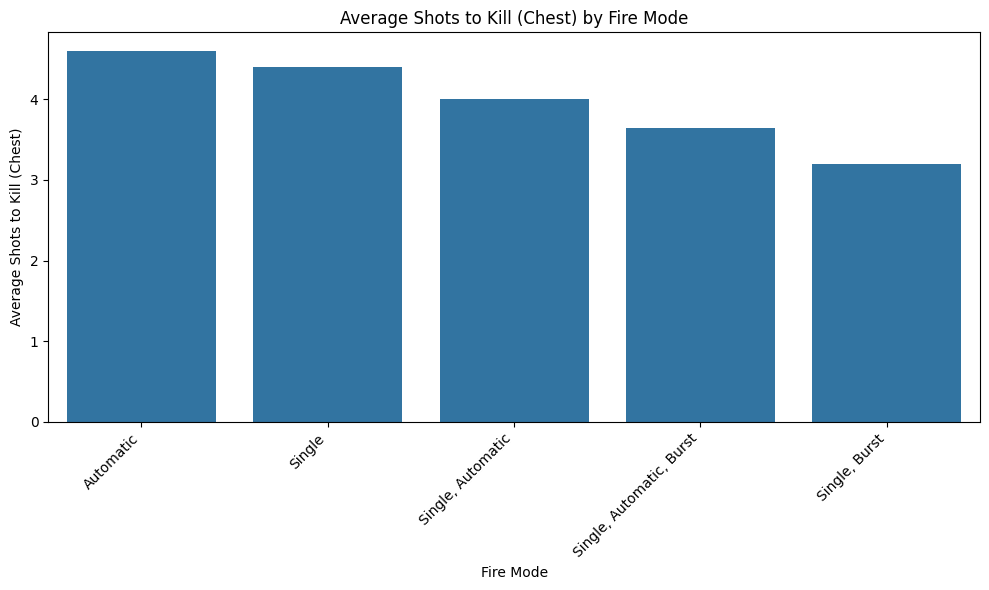

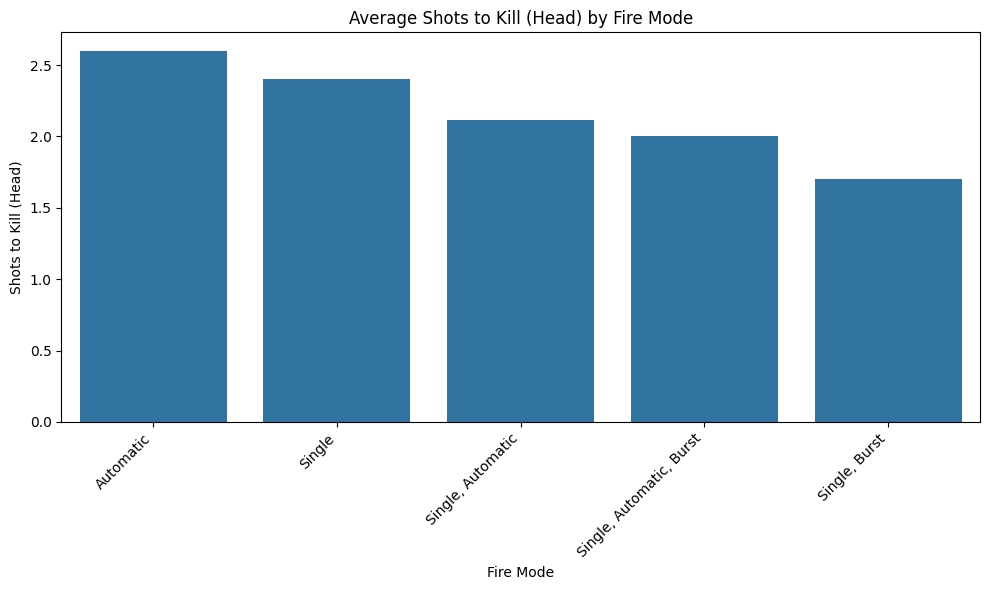

In [48]:
# Are there differences in Rate of Fire or Shots to Kill across Fire Mode?

# Group data by fire mode and calculate the mean of relevant performance metrics
fire_mode_stats = df.groupby('Fire Mode').agg({'Rate of Fire': 'mean', 'Shots to Kill (Chest)': 'mean','Shots to Kill (Head)':'mean'})

# Plotting Rate of Fire vs. Fire Mode
plt.figure(figsize=(10, 6))
sns.barplot(x=fire_mode_stats.index, y='Rate of Fire', data=fire_mode_stats.sort_values(by=['Rate of Fire'], ascending=False))
plt.title('Average Rate of Fire by Fire Mode')
plt.xlabel('Fire Mode')
plt.ylabel('Average Rate of Fire')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Shots to Kill (Chest) vs. Fire Mode
plt.figure(figsize=(10, 6))
sns.barplot(x=fire_mode_stats.index, y='Shots to Kill (Chest)', data=fire_mode_stats.sort_values(by=['Shots to Kill (Chest)'], ascending=False))
plt.title('Average Shots to Kill (Chest) by Fire Mode')
plt.xlabel('Fire Mode')
plt.ylabel('Average Shots to Kill (Chest)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

# Plotting Shots to Kill (Chest) vs. Fire Mode
plt.figure(figsize=(10, 6))
sns.barplot(x=fire_mode_stats.index, y='Shots to Kill (Head)', data=fire_mode_stats.sort_values(by=['Shots to Kill (Head)'], ascending=False))
plt.title('Average Shots to Kill (Head) by Fire Mode')
plt.xlabel('Fire Mode')
plt.ylabel('Shots to Kill (Head)')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

In [51]:
bdmg_cols = ['BDMG_0', 'BDMG_1', 'BDMG_2', 'BDMG_3']
hdmg_cols = ['HDMG_0', 'HDMG_1', 'HDMG_2', 'HDMG_3']


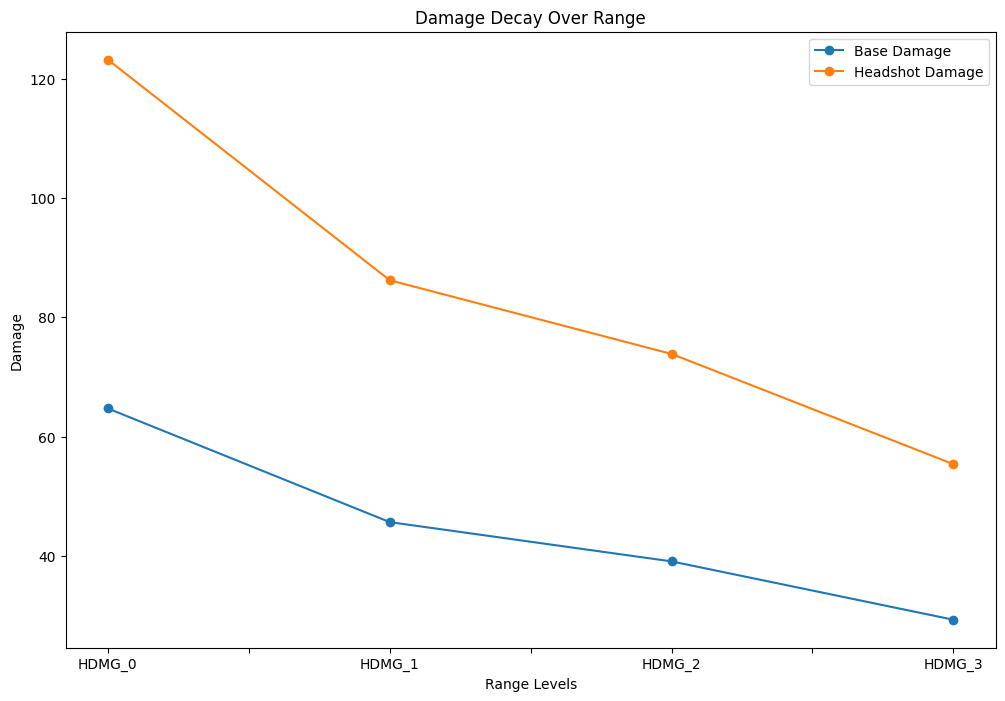

In [52]:
# Plot average base and headshot damage trends
df[bdmg_cols].mean().plot(kind='line', label='Base Damage', marker='o')
df[hdmg_cols].mean().plot(kind='line', label='Headshot Damage', marker='o')
plt.title('Damage Decay Over Range')
plt.xlabel('Range Levels')
plt.ylabel('Damage')
plt.legend()
plt.show()

now for each weapon type

   Weapon Name  Base_Damage_Drop  Headshot_Damage_Drop
36        P18C              12.3                  24.7
13         Uzi              14.3                  25.8
12      Vector              17.1                  30.7
15        MP5K              18.2                  32.7
35         P92              19.0                  38.0


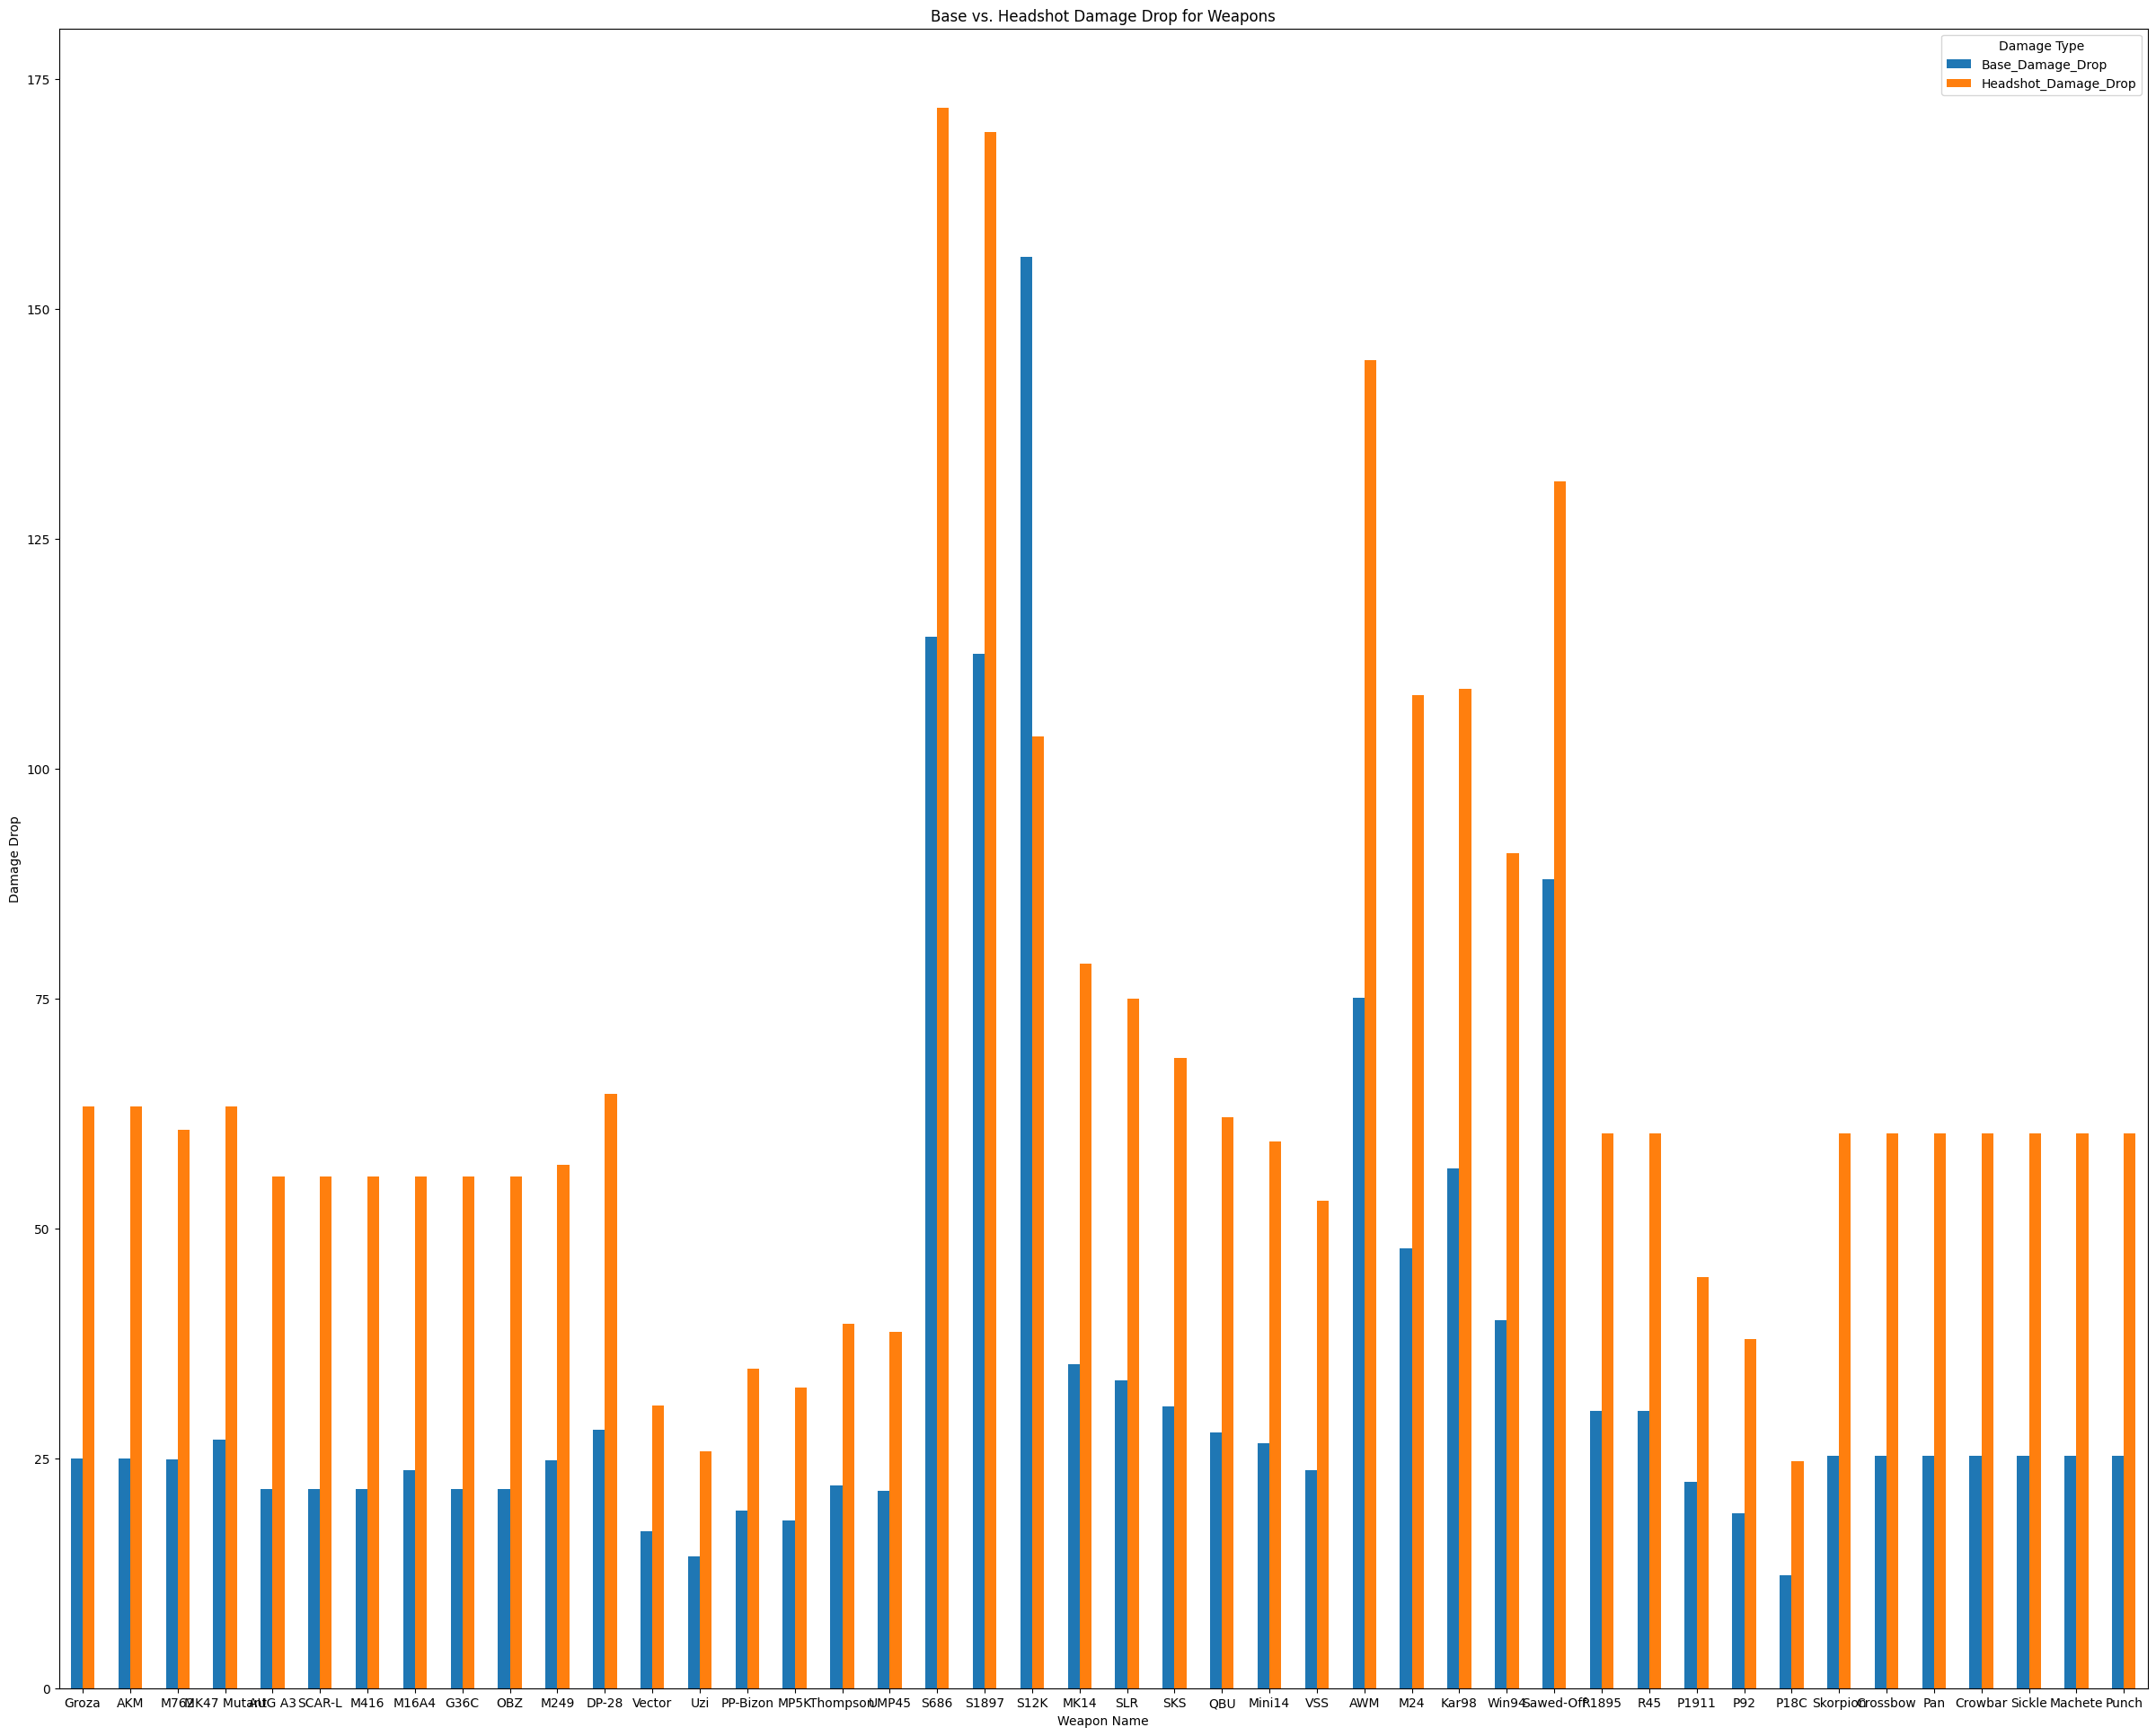

In [56]:
# Identify weapons with minimal damage drop over long distances.
# Highlight weapons with a significant gap between headshot and base damage.

# Calculate damage drop for base damage and headshot damage
df['Base_Damage_Drop'] = df['BDMG_0'] - df['BDMG_3']
df['Headshot_Damage_Drop'] = df['HDMG_0'] - df['HDMG_3']

# Sort weapons by smallest drop
minimal_drop_weapons = df.sort_values('Base_Damage_Drop')
print(minimal_drop_weapons[['Weapon Name', 'Base_Damage_Drop', 'Headshot_Damage_Drop']].head())

# Plot
df.set_index('Weapon Name')[['Base_Damage_Drop', 'Headshot_Damage_Drop']].plot(kind='bar', figsize=(30, 24))
plt.title('Base vs. Headshot Damage Drop for Weapons')
plt.ylabel('Damage Drop')
plt.xlabel('Weapon Name')
plt.xticks(rotation=0)
plt.legend(title="Damage Type")
plt.show()


Weapons with the smallest damage drop maintain consistent damage output across varying distances.

Damage drop occurs because bullets lose energy over longer ranges, resulting in reduced effectiveness.

---------------------------------------------------------------------------

Identify weapons with the largest difference, as these are most effective for headshots.

High Damage Gap Weapons:
These are ideal for players aiming for headshots, as they maximize damage efficiency with precise shots.


In [57]:
# Calculate difference between headshot and base damage for each range level
df['Damage_Gap_0'] = df['HDMG_0'] - df['BDMG_0']
df['Damage_Gap_1'] = df['HDMG_1'] - df['BDMG_1']
df['Damage_Gap_2'] = df['HDMG_2'] - df['BDMG_2']
df['Damage_Gap_3'] = df['HDMG_3'] - df['BDMG_3']

# Calculate average or maximum damage gap
df['Avg_Damage_Gap'] = df[['Damage_Gap_0', 'Damage_Gap_1', 'Damage_Gap_2', 'Damage_Gap_3']].mean(axis=1)

# Sort weapons by the largest gap
significant_gap_weapons = df.sort_values('Avg_Damage_Gap', ascending=False)
print(significant_gap_weapons[['Weapon Name', 'Avg_Damage_Gap']].head())


   Weapon Name  Avg_Damage_Gap
27         AWM          86.650
28         M24          75.800
18        S686          71.775
19       S1897          70.650
29       Kar98          65.175


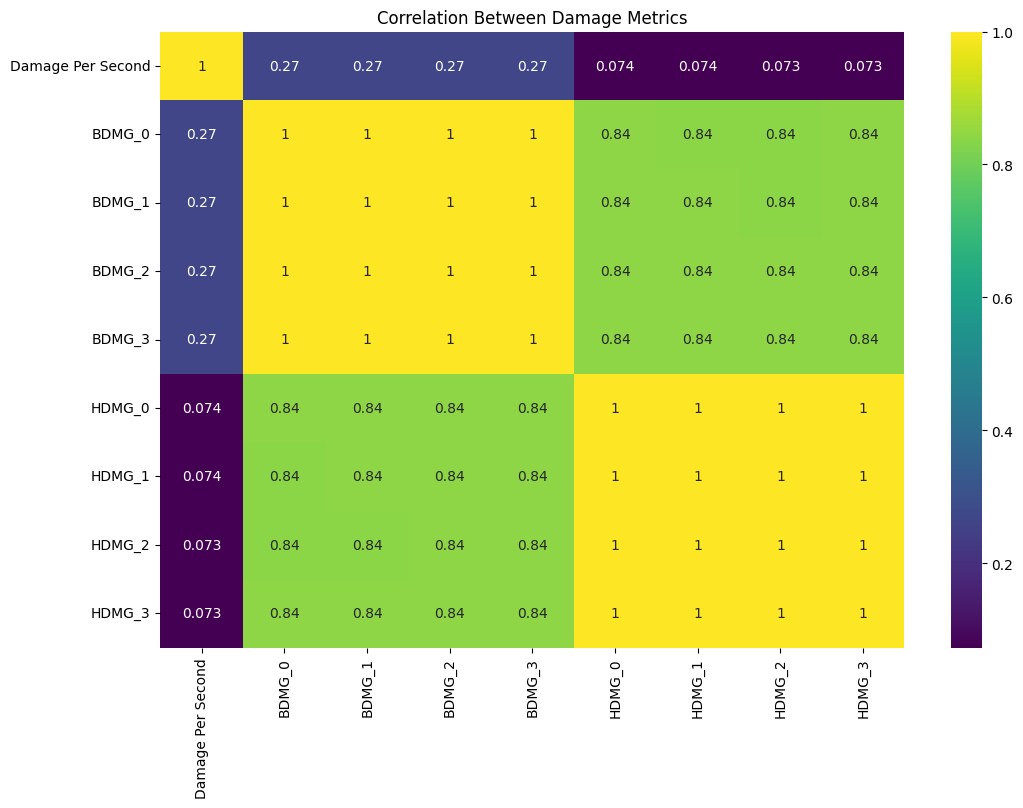

In [58]:
# Correlation analysis
correlation = df[['Damage Per Second'] + bdmg_cols + hdmg_cols].corr()
sns.heatmap(correlation, annot=True, cmap='viridis')
plt.title('Correlation Between Damage Metrics')
plt.show()


In [74]:
df['BDMG_Variance'] = df[bdmg_cols].var(axis=1)
df['HDMG_Variance'] = df[hdmg_cols].var(axis=1)

# Weapons with lowest variance (most versatile)
versatile_weapons = df[['Weapon Name', 'BDMG_Variance', 'HDMG_Variance']].sort_values('BDMG_Variance').reset_index().drop('index', axis=1)
print(versatile_weapons)


    Weapon Name  BDMG_Variance  HDMG_Variance
0          P18C      27.060000     108.910000
1           Uzi      36.475833     118.822500
2        Vector      52.282500     168.329167
3          MP5K      58.996667     190.766667
4           P92      64.375833     257.846667
5      PP-Bizon      66.376667     214.609167
6         UMP45      82.380000     266.969167
7        AUG A3      83.176667     551.229167
8        SCAR-L      83.176667     551.229167
9          M416      83.176667     551.229167
10         G36C      83.176667     551.229167
11          OBZ      83.176667     551.229167
12     Thompson      86.333333     280.142500
13        P1911      89.529167     356.353333
14          VSS     100.110000     500.806667
15        M16A4     100.110000     551.229167
16         M249     109.586667     577.649167
17         M762     110.016667     657.580000
18          AKM     110.509167     715.182500
19        Groza     110.509167     715.182500
20       Sickle     113.683333    

Versatile weapons perform reliably across all scenarios, ideal for general use

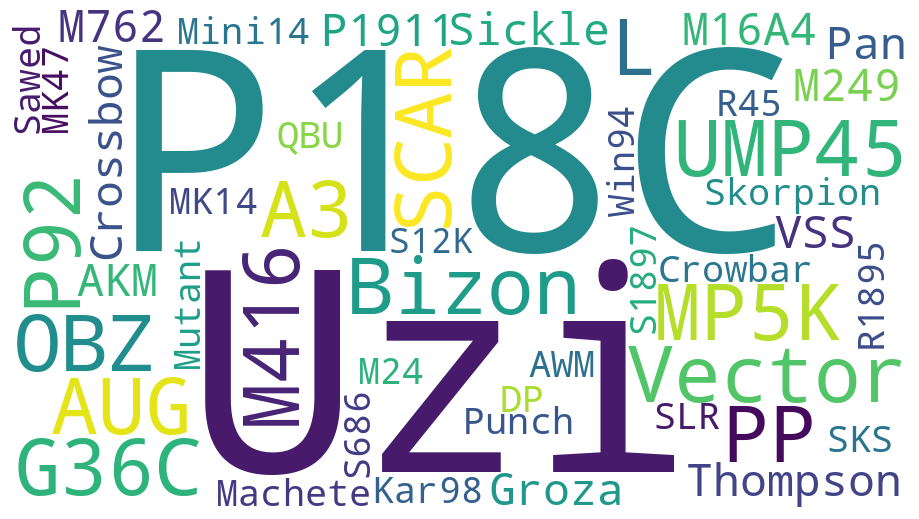

In [77]:


from wordcloud import WordCloud, STOPWORDS


# Extract weapon names from the DataFrame
weapon_names = versatile_weapons['Weapon Name'].tolist()

# Combine weapon names into a single string
text = " ".join(weapon_names)

# Create a WordCloud object
wordcloud = WordCloud(width=900, height=500, background_color="white", stopwords=STOPWORDS).generate(text)

# Display the generated image:
plt.figure(figsize=(10, 5), facecolor=None)
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad=0)
plt.show()